# INVENTORY DEMAND FORCASTING

### DATASET DETAILS:
```
i. SAMPLE - number of rows or observations in the dataset  
ii. INDEPENDENT VARIABLES
  - Variables (features) that are used to predict the target variable.    
  - 'Store', 'Date', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'  
iii. TARGET VARIABLE: Weekly_Sales
```
### MODELS IMPLEMENTED:
```
a. SUPPERVISED LEARNING  
    i. LINEAR REGRESSION  
    ii. POLY REGRESSION  
    iii. RIDGE REGRESSION  
    iv. LASSO REGRESSION  
    v. DECISION TREE
    vi. RANDOM FOREST  
    vii. KNN  
    viii. XGB REGRESSOR  
b. UNSUPPERVISED LEARNING  
    i. K MEANS CLUSTERING  
    ii. HEIRARCICAL CLUSTERING  
c. DEEP LEARNING  
    i. MULTI LAYER PERCEPTRON (MLP)  
```
---
---

### MOUNT DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### IMPORT REQUIRED LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

### LOAD THE DATASET

In [ ]:
path = '/content/drive/MyDrive/RVU S4/Walmart.csv'
df = pd.read_csv(path)

### DISPLAY FIRST 5 ROWS

In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


----
----
### EXPLORATORY DATA ANALYSIS (EDA)
```
EDA is an approach to analyzing the data using visual techniques. It is used to discover trends, and patterns, or to check assumptions with the
help of statistical summaries and graphical representations.
```

In [ ]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
# SAMPLES: Number of rows or observations in the dataset
df.shape

(6435, 8)

In [ ]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [ ]:
df.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

---
---
#DATA PRE-PROCESSING
### HANDELING MISSING VALUES

In [ ]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

### FEATURE ENGINEERING

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")
df.Date.head()

0   2010-02-05
1   2010-02-12
2   2010-02-19
3   2010-02-26
4   2010-03-05
Name: Date, dtype: datetime64[ns]

In [ ]:
def Season(quarter):
    seasons = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
    return seasons.get(quarter, 'Invalid Quarter')

In [ ]:
data = df.assign(
    year = df['Date'].dt.year,
    quarter = df['Date'].dt.quarter,
    season = df['Date'].dt.quarter.map(Season),
    month = df['Date'].dt.month,
    month_name = df['Date'].dt.month_name(),
    week = df['Date'].dt.isocalendar().week,
    day=df['Date'].dt.day_name()
)

In [ ]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,quarter,season,month,month_name,week,day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,1,Winter,2,February,5,Friday
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,1,Winter,2,February,6,Friday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,1,Winter,2,February,7,Friday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,1,Winter,2,February,8,Friday
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,1,Winter,3,March,9,Friday


In [ ]:
data.shape

(6435, 15)

---
---
# DATA VISUALIZATION

<Axes: xlabel='season'>

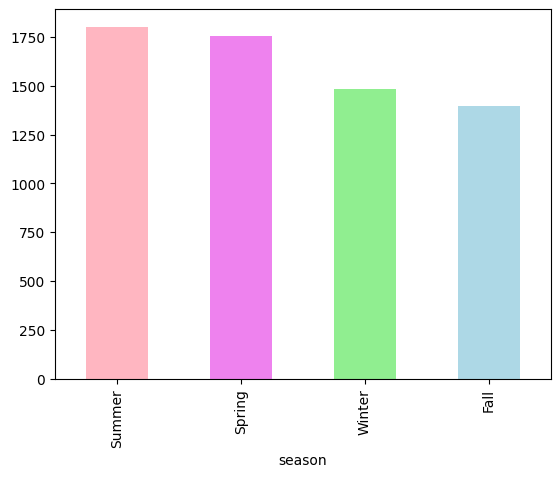

In [ ]:
data.season.value_counts().plot(kind="bar", color=['lightpink', 'violet', 'lightgreen', 'lightblue'])

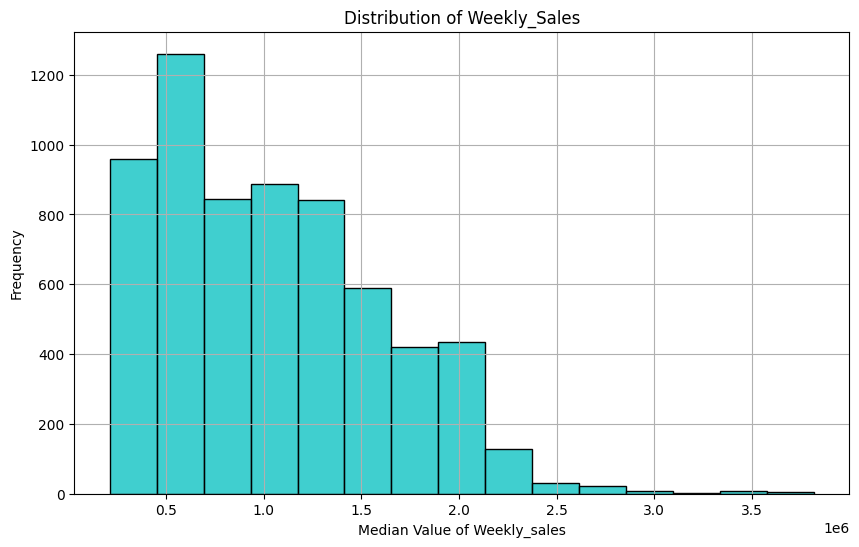

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data = data, x = 'Weekly_Sales', bins = 15, color = 'c')
plt.title('Distribution of Weekly_Sales')
plt.xlabel('Median Value of Weekly_sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### TOTAL SALES IN EACH YEAR

In [ ]:
data.groupby('year')['Weekly_Sales'].sum().sort_values(ascending = False)

year
2011    2.448200e+09
2010    2.288886e+09
2012    2.000133e+09
Name: Weekly_Sales, dtype: float64

<ipython-input-46-49c02a710cb8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = data, x = 'year', y = 'Weekly_Sales', estimator = np.sum, palette=['lightpink', 'violet', 'lightblue'])


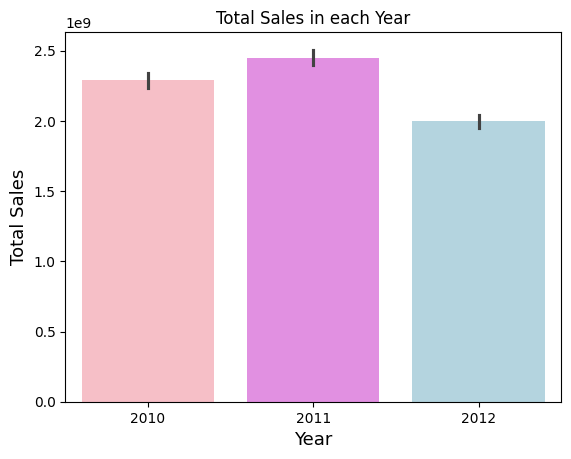

In [ ]:
sns.barplot(data = data, x = 'year', y = 'Weekly_Sales', estimator = np.sum, palette=['lightpink', 'violet', 'lightblue'])

plt.title('Total Sales in each Year')
plt.xlabel('Year', size = 13)
plt.ylabel('Total Sales', size = 13)
plt.show()

### TOTAL SALES IN EACH MONTH

In [ ]:
data.groupby('month_name')['Weekly_Sales'].sum().sort_values(ascending = False)

month_name
July         6.500010e+08
April        6.468598e+08
June         6.226299e+08
August       6.130902e+08
March        5.927859e+08
October      5.847848e+08
September    5.787612e+08
December     5.768386e+08
February     5.687279e+08
May          5.571256e+08
November     4.130157e+08
January      3.325984e+08
Name: Weekly_Sales, dtype: float64

<ipython-input-48-96fbbbbc09e8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = data, x = 'month_name', y = 'Weekly_Sales', estimator = np.sum, palette="hsv")


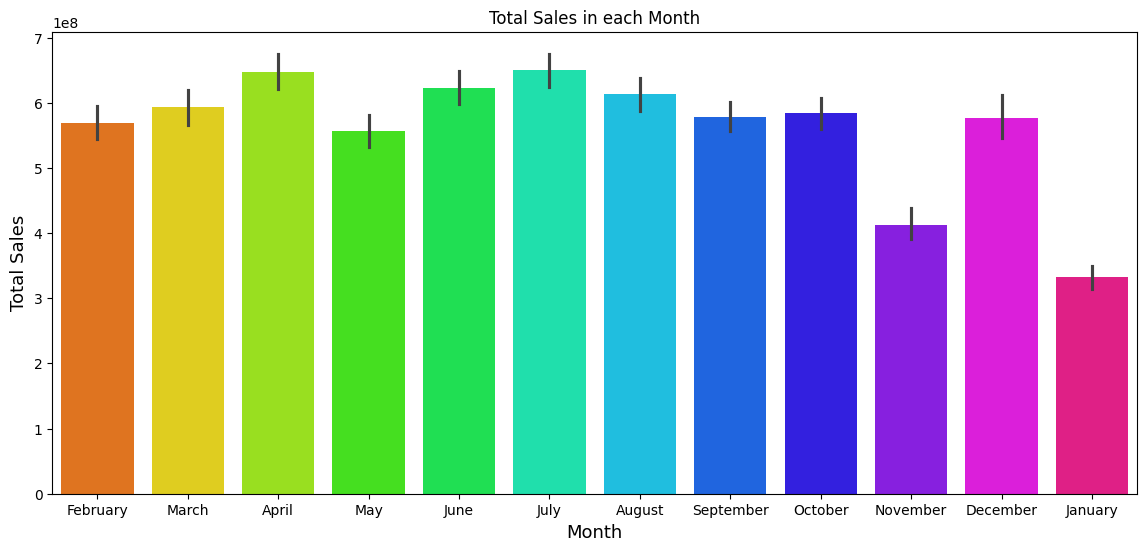

In [ ]:
plt.figure(figsize = (14, 6))
sns.barplot(data = data, x = 'month_name', y = 'Weekly_Sales', estimator = np.sum, palette="hsv")

plt.title('Total Sales in each Month')
plt.xlabel('Month', size = 13)
plt.ylabel('Total Sales', size = 13)
plt.show()

### TOTAL SALES IN EACH WEEK

In [ ]:
data.groupby('week')['Weekly_Sales'].sum().sort_values(ascending = False)

week
51    1.579297e+08
22    1.472422e+08
7     1.471902e+08
27    1.470118e+08
14    1.467551e+08
6     1.456823e+08
23    1.451475e+08
31    1.437064e+08
24    1.434817e+08
26    1.430931e+08
18    1.424894e+08
5     1.419895e+08
33    1.413328e+08
21    1.409434e+08
34    1.407740e+08
36    1.407277e+08
9     1.407131e+08
25    1.401614e+08
32    1.401174e+08
40    1.398813e+08
35    1.397305e+08
13    1.391557e+08
16    1.384837e+08
10    1.380332e+08
28    1.378596e+08
19    1.377021e+08
15    1.367863e+08
11    1.367628e+08
29    1.362228e+08
20    1.359906e+08
43    1.350028e+08
42    1.340080e+08
8     1.338659e+08
41    1.336528e+08
47    1.324146e+08
30    1.324108e+08
12    1.320040e+08
37    1.311007e+08
17    1.309520e+08
38    1.284312e+08
39    1.281706e+08
50    1.219065e+08
49    1.112279e+08
48    9.929958e+07
45    9.459903e+07
44    9.443753e+07
46    9.156456e+07
1     8.773121e+07
52    8.647498e+07
3     8.273564e+07
2     8.269676e+07
4     7.943483e+07
Name: W

<ipython-input-50-2f2a81463b7d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = data, x = 'week', y = 'Weekly_Sales', estimator = np.sum, palette="hsv")


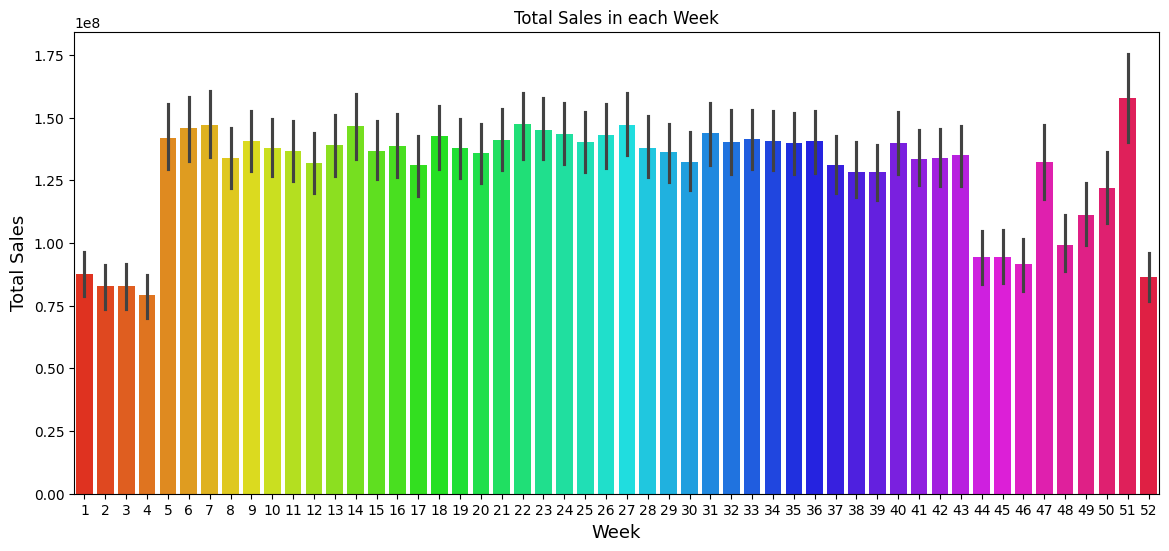

In [ ]:
plt.figure(figsize = (14, 6))
sns.barplot(data = data, x = 'week', y = 'Weekly_Sales', estimator = np.sum, palette="hsv")

plt.title('Total Sales in each Week')
plt.xlabel('Week', size = 13)
plt.ylabel('Total Sales', size = 13)
plt.show()

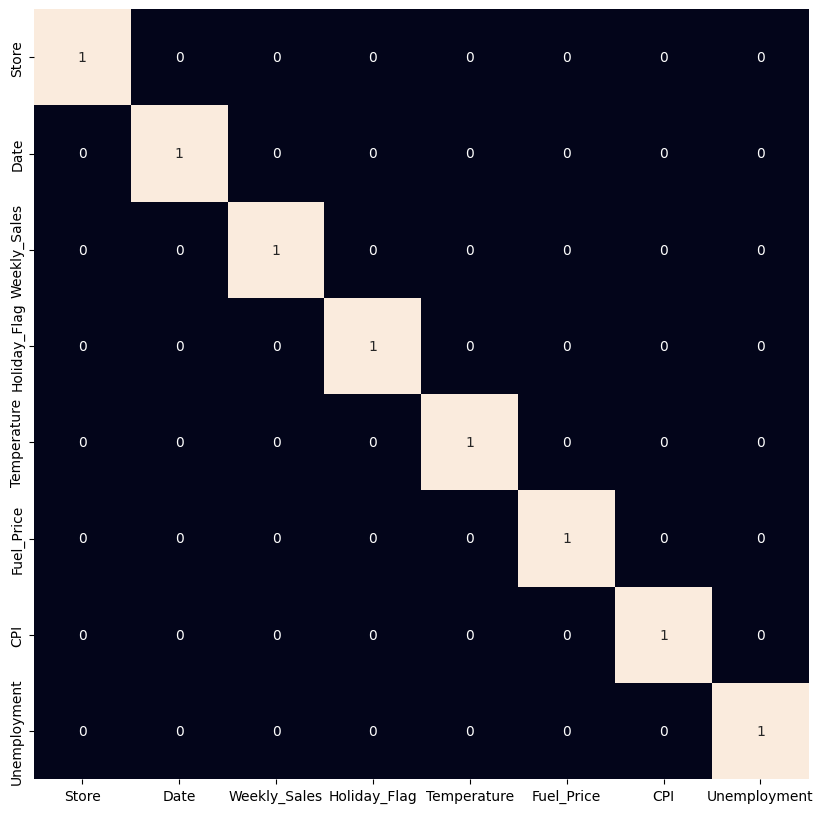

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr() > 0.8,
           annot=True,
           cbar=False)
plt.show()

----
----
# DATA TYPE CASTING


```
To make sure no changes are made in the original Data
Thus the code is copied and assigned to df1
```

In [ ]:
df1 = data.copy()

In [ ]:
# The below columns dropped
df1.drop(['Date', 'year', 'quarter', 'month', 'day'], axis = 1, inplace = True)

In [ ]:
df1.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,season,month_name,week
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,Winter,February,5
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,Winter,February,6
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,Winter,February,7
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,Winter,February,8
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,Winter,March,9


In [ ]:
df1.dtypes

Store             int64
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
season           object
month_name       object
week             UInt32
dtype: object

```
Features like Store,holiday flag and week are converted (explicitly) from numerical data to categorical data for better analysis and modelling
```

In [ ]:
df1['Store'] = df1['Store'].astype('object')
df1['Holiday_Flag'] = df1['Holiday_Flag'].astype('object')
df1['week'] = df1['week'].astype('object')

In [ ]:
df1.dtypes

Store            object
Weekly_Sales    float64
Holiday_Flag     object
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
season           object
month_name       object
week             object
dtype: object

In [ ]:
df1.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,season,month_name,week
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,Winter,February,5
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,Winter,February,6
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,Winter,February,7
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,Winter,February,8
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,Winter,March,9


---
---
# DATA TRANSFORMATION
```
Splitting the data into Numerical Features and Categorical Features
```

In [ ]:
df1.drop(['month_name', 'season'], axis = 1, inplace = True)

In [ ]:
num_features = df1.select_dtypes('number').columns.to_list()
num_features.remove('Weekly_Sales')

cat_features = df1.select_dtypes('object').columns.to_list()

print(f'Numerical Features : {num_features}')
print(f'Categorical Features: {cat_features}')

Numerical Features : ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
Categorical Features: ['Store', 'Holiday_Flag', 'week']


---
---
# DETECTING N REMOVING THE OUTLIERS
```
Outlier detection is a method used to find unusual or abnormal data points in a set of information. In data, outliers are
points that deviate significantly from the majority, and detecting them helps identify unusual patterns or errors in the
information.
```
### Z-SCORE
```
z-scores is to standardize data and compare individual data points to the overall dataset. It helps in identifying how far
a particular data point is from the mean of the dataset, measured in terms of standard deviations.
```

In [ ]:
#Calculate the z score
z_scores = (df1 - df1.mean())/df1.std()
z_scores

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,week
0,-1.693847,1.057338,-0.274183,-0.995058,-1.713667,1.004097,0.056959,-1.473415
1,-1.693847,1.054266,3.646633,-1.201077,-1.765952,1.007802,0.056959,-1.40264
2,-1.693847,1.001128,-0.274183,-1.124091,-1.840023,1.008996,0.056959,-1.331865
3,-1.693847,0.642778,-0.274183,-0.760848,-1.737631,1.009771,0.056959,-1.261089
4,-1.693847,0.899844,-0.274183,-0.767896,-1.598203,1.010546,0.056959,-1.190314
...,...,...,...,...,...,...,...,...
6430,1.693847,-0.591443,-0.274183,0.228584,1.390775,0.519229,0.36508,0.932949
6431,1.693847,-0.555507,-0.274183,0.229126,1.364632,0.523215,0.356018,1.003724
6432,1.693847,-0.553719,-0.274183,-0.335799,1.397311,0.5272,0.356018,1.074499
6433,1.693847,-0.58267,-0.274183,-0.227368,1.329776,0.527292,0.356018,1.145275


In [ ]:
threshold = 3
outlier_indices = (z_scores > threshold).any(axis=1)
outliers_df = df1[outlier_indices]

print("Rows with Outliers:", outliers_df)

Rows with Outliers:      Store  Weekly_Sales Holiday_Flag  Temperature  Fuel_Price         CPI  \
1        1    1641957.44            1        38.51       2.548  211.242170   
31       1    1507460.69            1        78.69       2.565  211.495190   
42       1    1955624.11            1        64.52       2.735  211.748433   
47       1    1367320.01            1        48.43       2.943  211.404932   
53       1    1649614.93            1        36.39       3.022  212.936705   
...    ...           ...          ...          ...         ...         ...   
6375    45     746129.56            1        71.48       3.738  186.673738   
6386    45    1170672.94            1        48.71       3.492  188.350400   
6391    45     869403.63            1        37.79       3.389  189.062016   
6397    45     803657.12            1        37.00       3.640  189.707605   
6427    45     766512.66            1        75.70       3.911  191.577676   

      Unemployment week  
1            8.10

In [ ]:
print("Outliers detected using Z-score method:\n", outliers_df.count())

Outliers detected using Z-score method:
 Store           675
Weekly_Sales    675
Holiday_Flag    675
Temperature     675
Fuel_Price      675
CPI             675
Unemployment    675
week            675
dtype: int64


In [ ]:
outlier_indices.sum()

675

In [ ]:
df1 = df1[~outlier_indices]
df1.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,week
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,5
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,7
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,8
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,9
5,1,1439541.59,0,57.79,2.667,211.380643,8.106,10


In [ ]:
df1.shape

(5760, 8)

---
---
# SPLITTING THE DATA INTO TRAINING N TESTING DATA
```
Features - independent variable (excluding Weekly_Sales)
Target variable - Weekly_Sales
X_train: Training data - features
X_test: Testing Data - features
y_train: Training data on target variables
y_test: Testing data on target variables
```

In [ ]:
X = df1.drop('Weekly_Sales', axis = 1)
y = df1['Weekly_Sales']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
print('Shape of data      : ', X.shape)
print('Shape of train data: ', X_train.shape)
print('Shape of test data : ', X_test.shape)

Shape of data      :  (5760, 7)
Shape of train data:  (4608, 7)
Shape of test data :  (1152, 7)


---
---
# StandardScaler


In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.5 MB/s eta 0:00:00


In [ ]:
from sklearn.preprocessing import StandardScaler
from category_encoders import BinaryEncoder
from sklearn.compose import ColumnTransformer
# data transformation pipeline
preprocessor = ColumnTransformer([
                                   #('Temperature', 'Fuel_Price', 'CPI', and 'Unemployment'.)
                                  ('num_features', StandardScaler(), num_features),  # helps prevent larger scales from dominating the training process
                                                                                     #Example of temperature range(0-40) and weekly sales(0-100000) thus weekly sales overpowers temperature
                                   #(Store','Holiday_Flag','week'.)
                                  ('cat_features', BinaryEncoder(), cat_features),  # encoding categorical features into binary format
                                                                                    #reduces dimensionality
                                ])

# Fitting the training data
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num_features', StandardScaler(),
                                 ['Temperature', 'Fuel_Price', 'CPI',
                                  'Unemployment']),
                                ('cat_features', BinaryEncoder(),
                                 ['Store', 'Holiday_Flag', 'week'])])

In [ ]:
# Transform the training data
X_train_transformed = preprocessor.transform(X_train)
print("X_train_transformed: \n", X_train_transformed)
print()

# Transform the testing data
X_test_transformed = preprocessor.transform(X_test)
print("X_test_transformed: \n", X_test_transformed)

X_train_transformed: 
 [[ 1.45986062  0.42891043  1.34480728 ...  0.          0.
   1.        ]
 [-0.06254395  0.49804704 -1.0714871  ...  0.          1.
   0.        ]
 [ 0.50655331 -1.43777821 -0.93022999 ...  0.          1.
   1.        ]
 ...
 [-0.63885902  0.81564337  0.66920779 ...  1.          0.
   0.        ]
 [ 1.07509535 -1.71864571  0.77928137 ...  1.          0.
   1.        ]
 [-0.78932279  0.62335716  0.51187131 ...  1.          1.
   0.        ]]

X_test_transformed: 
 [[ 0.43493034 -1.21740524 -0.938988   ...  0.          1.
   0.        ]
 [-1.73152576  0.81780389 -0.91203129 ...  0.          1.
   0.        ]
 [-0.59999385 -1.05320578 -1.04916382 ...  0.          0.
   1.        ]
 ...
 [ 1.51982404  0.3921816   1.17768091 ...  0.          0.
   1.        ]
 [ 0.03850552  1.19805528  0.63125089 ...  1.          1.
   1.        ]
 [-0.2224464  -0.29486352 -1.17701253 ...  1.          1.
   0.        ]]


# HYPERPARAMETER TUNING
```
Hyperparameter tuning is the process of selecting the optimal values for a machine learning model’s hyperparameters. Hyperparameters are
settings that control the learning process of the model, such as the learning rate, the number of neurons in a neural network, or the kernel
size in a support vector machine. The goal of hyperparameter tuning is to find the values that lead to the best performance on a given task.
```

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [ ]:
def hyperparameter_tunning(estimator, X_train, y_train, param_grid, score = 'r2', n = 5):
    '''This function is used to find the best set of hyperparameters for the model to optimize its performance'''

    # Perform grid search and find the best combination of hyperparameters
    grid_search = GridSearchCV(estimator = estimator,
                               param_grid = param_grid,
                               scoring = score,)

    grid_search.fit(X_train,y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Print the best parameters and score
    print(f'Best parameters: {best_params} \n')
    print(f'Best score: {best_score}')

    # best estimator
    best_estimator = grid_search.best_estimator_

    return best_estimator

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

def hyperparameter_tuning_random(estimator, X_train, y_train, param_distributions, score='r2', n_iter=1,cv=5, verbose=1, random_state=None):
    '''This function is used to find the best set of hyperparameters for the model using RandomizedSearchCV'''

    # Perform random search and find the best combination of hyperparameters
    random_search = RandomizedSearchCV(estimator=estimator,
                                       param_distributions=param_distributions,
                                       scoring=score,
                                       n_iter=n_iter,
                                       cv=cv,
                                       verbose=verbose,
                                       random_state=random_state)

    random_search.fit(X_train, y_train)

    best_params = random_search.best_params_
    best_score = random_search.best_score_

    # Print the best parameters and score
    print(f'Best parameters: {best_params} \n')
    print(f'Best score: {best_score}')

    # Best estimator
    best_estimator = random_search.best_estimator_

    return best_estimator


---
---
# CROSS VALIDATION

In [ ]:
def cross_validation_score(estimator, X_train, y_train, score = 'r2', n = 5):
    '''This function is to validate the model'''
    validate = cross_val_score(estimator, X_train, y_train, scoring = score, cv = n)

    print(f'Cross Validation Scores: {validate} \n')
    print(f'Mean of Scores: {round(validate.mean() * 100, 2)} % \n')
    print(f'Standard Deviation of Scores: {validate.std()}')

----
----
# EVALUATION METRICS
1. Mean Absolute Error (MAE)
2. Mean Squared Error (MSE)
3. Root Mean Squared Error (RMSE)
4. R Squared (R2)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def model_evaluation(estimator, Training_Testing, X, y):
    '''This function is used to evaluate the model through MAE, MSE, RMSE, and R2'''

    # Predictions
    y_pred = estimator.predict(X)

    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(y, y_pred)

    # Mean Squared Error (MSE)
    mse = mean_squared_error(y, y_pred)

    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)

    # R Squared (R2)
    r2 = r2_score(y, y_pred)

    # Print evaluation metrics
    print(f'{Training_Testing} Accuracy: ')
    print(f'Mean Absolute Error (MAE): {round(mae, 2)}')
    print(f'Mean Squared Error (MSE): {round(mse, 2)}')
    print(f'Root Mean Squared Error (RMSE): {round(rmse, 2)}')
    print(f'R Squared (R2) score: {round(r2 * 100, 2)} % \n')

---
---
#  VISUALIZATION

In [ ]:
def Distribution_Plot(estimator, Training_Testing, X, y, Title):

    """This function is used to perform some model evaluation using training and testing data \
    by plotting the distribution of the actual and predicted values of the training or testing data."""

    predicted_values = estimator.predict(X)

    plt.figure(figsize=(14, 6))
    ax1 = sns.distplot(y, hist = False, color = "b", label = f'Actual Values ({Training_Testing})')
    ax2 = sns.distplot(predicted_values, hist = False, color = "r", label = f'Predicted Values ({Training_Testing})', ax = ax1)
    plt.title(Title, size = 18)
    plt.legend()
    plt.show()

---
---
# REGRESSION MODEL
```
Regression is a supervised machine learning technique which is used to predict continuous values. The ultimate goal of the
regression algorithm is to plot a best-fit line or a curve between the data.
```

# LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression

Linear_model = LinearRegression()

# Fitting the data
Linear_model.fit(X_train_transformed, y_train)

LinearRegression()

In [ ]:
cross_validation_score(Linear_model, X_train_transformed, y_train)

Cross Validation Scores: [0.2915783  0.30593298 0.33079577 0.31448938 0.28893824] 

Mean of Scores: 30.63 % 

Standard Deviation of Scores: 0.015397347663556887


In [ ]:
model_evaluation(Linear_model, 'Training', X_train_transformed, y_train)

Training Accuracy: 
Mean Absolute Error (MAE): 358406.76
Mean Squared Error (MSE): 204470961002.3
Root Mean Squared Error (RMSE): 452184.65
R Squared (R2) score: 31.08 % 



In [ ]:
model_evaluation(Linear_model,'Testing', X_test_transformed, y_test)

Testing Accuracy: 
Mean Absolute Error (MAE): 362471.07
Mean Squared Error (MSE): 210920722575.97
Root Mean Squared Error (RMSE): 459261.06
R Squared (R2) score: 31.86 % 



<ipython-input-79-badbd7f54b25>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist = False, color = "b", label = f'Actual Values ({Training_Testing})')
<ipython-input-79-badbd7f54b25>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(predicted_values, hist = F

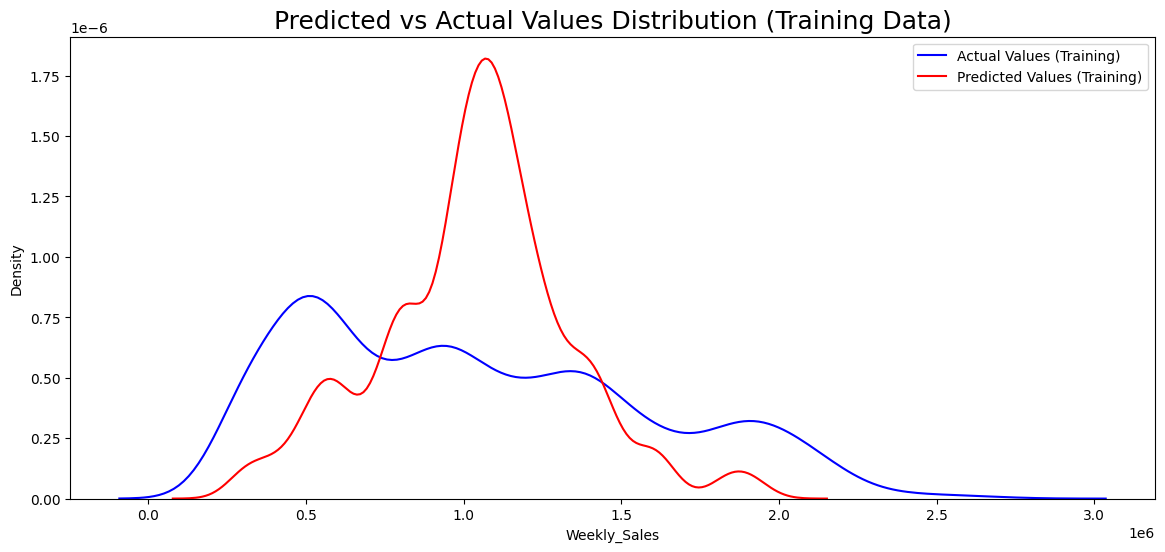

In [ ]:
Title = 'Predicted vs Actual Values Distribution (Training Data)'
Distribution_Plot(Linear_model, 'Training',X_train_transformed, y_train, Title)

<ipython-input-79-badbd7f54b25>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist = False, color = "b", label = f'Actual Values ({Training_Testing})')
<ipython-input-79-badbd7f54b25>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(predicted_values, hist = F

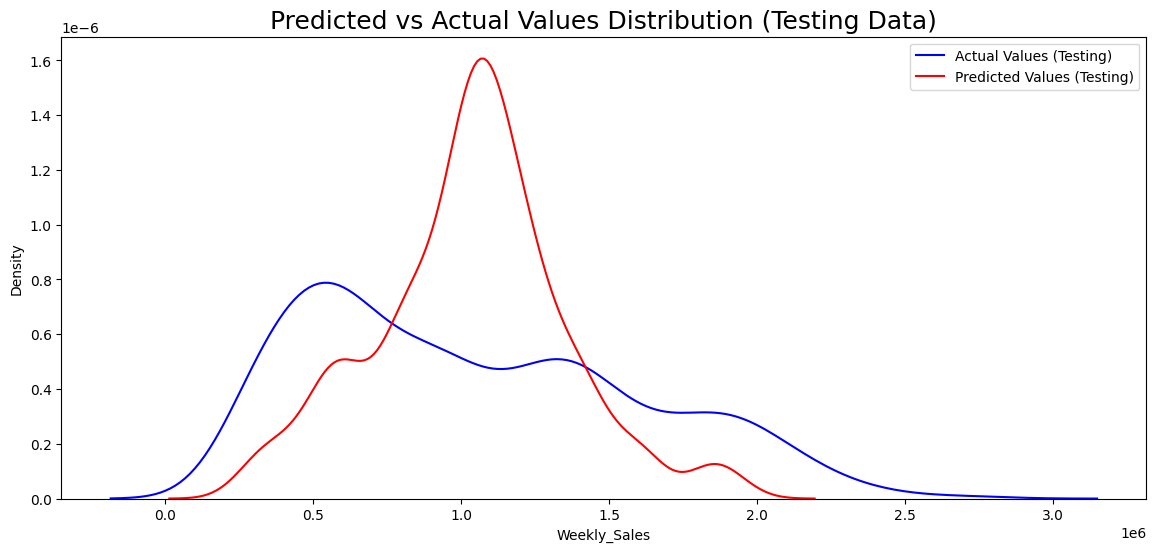

In [ ]:
Title = 'Predicted vs Actual Values Distribution (Testing Data)'
Distribution_Plot(Linear_model,'Testing', X_test_transformed, y_test, Title)

## OBSERVATION:
```
No linear correlation between variable and target. From this we can say that model isn't doing well in learning the
training dataset. So, we can increase the complexity of the model i.e Polynomial Regression Model.
```

---
---
# POLYNOMIAL REGRESSION
```
DEFINE: Polynomial Regression fits a curve to the data rather than a straight line, allowing for more complex
relationships to be captured. It is used when the relationship between the independent and dependent variables
is not linear but rather curvilinear.

Steps for Polynomial Regression:
  - Data Pre-processing
  - Build a Linear Regression model and fit it to the dataset
  - Build a Polynomial Regression model and fit it to the dataset
  - Visualize the result for Linear Regression and Polynomial Regression model.
  - Predicting the output.
```

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

In [ ]:
Linear_pipe = Pipeline([('poly_feat', PolynomialFeatures()), ('lin_reg',LinearRegression())])

In [ ]:
param_grid = {'poly_feat__degree':[2, 3, 4]}

In [ ]:
best_estimator = hyperparameter_tunning(Linear_pipe, X_train_transformed, y_train, param_grid, score='r2', n=5)

Best parameters: {'poly_feat__degree': 3} 

Best score: 0.964416138501166


In [ ]:
# Linear Regression Model After Tunning
poly_reg = best_estimator

In [ ]:
# Define the parameter grid for PolynomialFeatures
poly_param_grid = {'poly_feat__degree': [2, 3, 4]}  # Use 'poly_feat__degree' instead of 'degree'

# Create a pipeline for PolynomialFeatures
poly_pipe = Pipeline([('poly_feat', PolynomialFeatures())])

In [ ]:
# Perform hyperparameter tuning for PolynomialFeatures
poly_random_search = RandomizedSearchCV(estimator=poly_pipe, param_distributions=poly_param_grid,
                                       scoring='r2', n_iter=1, cv=5, verbose=1, random_state=None)

In [ ]:
poly_random_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_available_if.py", line 32, in __get__
    if not self.check(obj):
  File "/usr/local/lib/python3.10/dist-packages/

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('poly_feat',
                                              PolynomialFeatures())]),
                   n_iter=1,
                   param_distributions={'poly_feat__degree': [2, 3, 4]},
                   scoring='r2', verbose=1)

In [ ]:
# Get the best PolynomialFeatures
best_poly_features = poly_random_search.best_estimator_['poly_feat']

# Create a pipeline for LinearRegression with best PolynomialFeatures
best_linear_pipe = Pipeline([('poly_feat', best_poly_features), ('lin_reg', LinearRegression())])

# Fit the entire pipeline and obtain the best estimator
best_linear_pipe.fit(X_train, y_train)

Pipeline(steps=[('poly_feat', PolynomialFeatures(degree=4)),
                ('lin_reg', LinearRegression())])

In [ ]:
cross_validation_score(poly_reg, X_train_transformed, y_train)

Cross Validation Scores: [0.96908414 0.95206403 0.96361262 0.96765299 0.96966692] 

Mean of Scores: 96.44 % 

Standard Deviation of Scores: 0.006527760931850554


In [ ]:
model_evaluation(poly_reg, 'Training', X_train_transformed, y_train)

Training Accuracy: 
Mean Absolute Error (MAE): 58374.79
Mean Squared Error (MSE): 6886879714.26
Root Mean Squared Error (RMSE): 82987.23
R Squared (R2) score: 97.68 % 



In [ ]:
model_evaluation(poly_reg,'Testing', X_test_transformed, y_test)

Testing Accuracy: 
Mean Absolute Error (MAE): 69004.3
Mean Squared Error (MSE): 9318364369.55
Root Mean Squared Error (RMSE): 96531.68
R Squared (R2) score: 96.99 % 



In [ ]:
# Evaluate the best estimator
best_score = poly_reg.score(X_test_transformed, y_test)
print(f'Best score: {best_score}')

Best score: 0.9698954542825006


<ipython-input-79-badbd7f54b25>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist = False, color = "b", label = f'Actual Values ({Training_Testing})')
<ipython-input-79-badbd7f54b25>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(predicted_values, hist = F

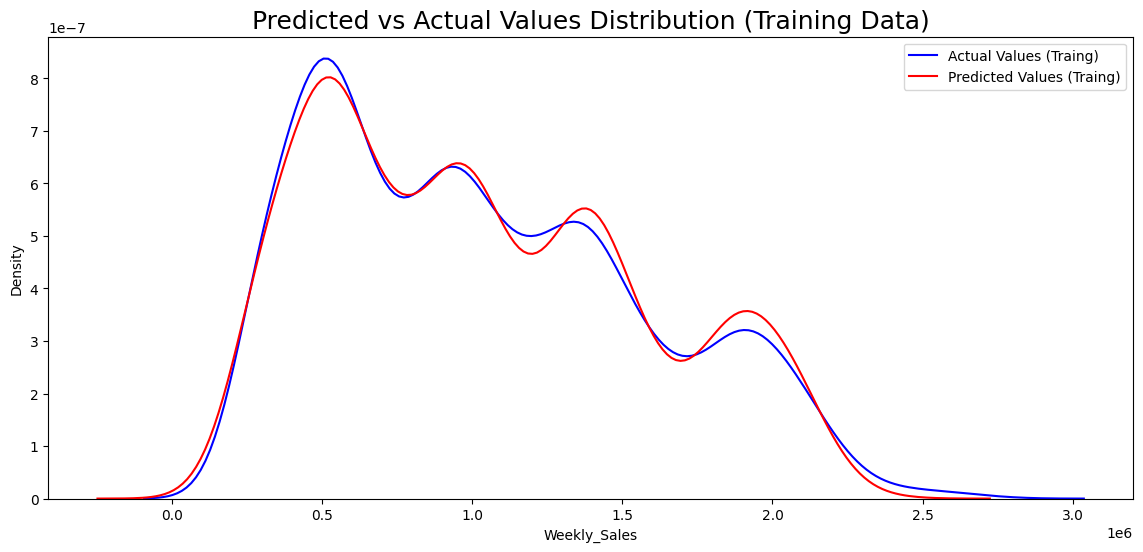

In [ ]:
Title = 'Predicted vs Actual Values Distribution (Training Data)'
Distribution_Plot(poly_reg, 'Traing',X_train_transformed, y_train, Title)

<ipython-input-79-badbd7f54b25>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist = False, color = "b", label = f'Actual Values ({Training_Testing})')
<ipython-input-79-badbd7f54b25>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(predicted_values, hist = F

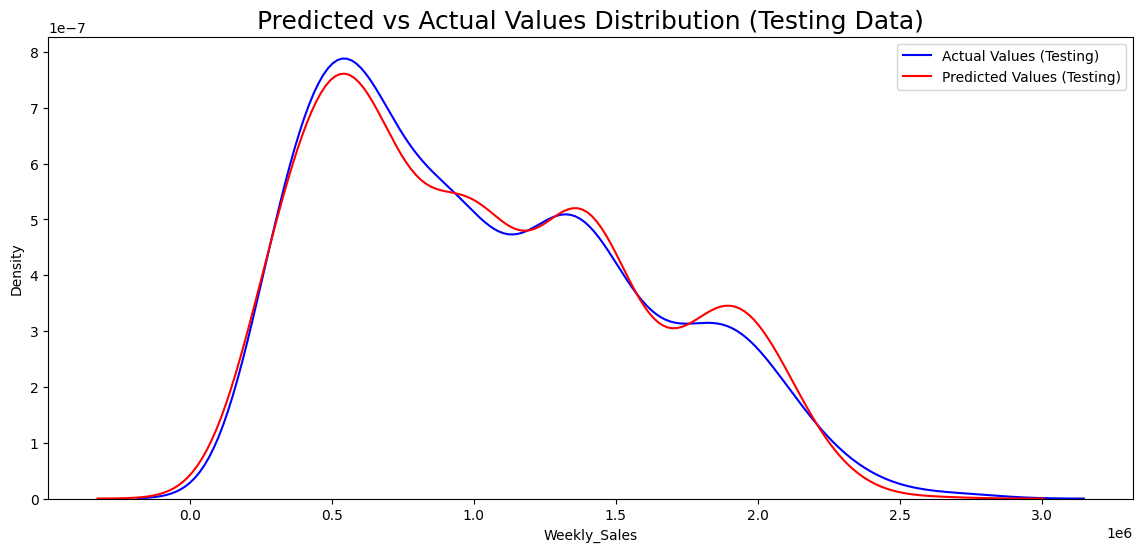

In [ ]:
Title = 'Predicted vs Actual Values Distribution (Testing Data)'
Distribution_Plot(poly_reg,'Testing', X_test_transformed, y_test, Title)

---
---
# RIDGE REGRESSION

## GRID SEARCH

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define the Ridge regression model
ridge_model = Ridge()

In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid_ridge = {'alpha': [0.01, 0.1, 1, 10]}

In [ ]:
# Perform grid search cross-validation
ridge_grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid_ridge, scoring='r2', cv=5)
ridge_grid_search.fit(X_train_transformed, y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.01, 0.1, 1, 10]},
             scoring='r2')

In [ ]:
cross_validation_score(ridge_grid_search, X_train_transformed, y_train)

Cross Validation Scores: [0.29155659 0.30573635 0.33100816 0.31453907 0.28893837] 

Mean of Scores: 30.64 % 

Standard Deviation of Scores: 0.01547560755651767


In [ ]:
# Get the best parameters and best score
best_params_ridge = ridge_grid_search.best_params_
best_score_ridge = ridge_grid_search.best_score_

print("Best Parameters for Ridge Regression:", best_params_ridge)
print("Best Score for Ridge Regression:", best_score_ridge)

Best Parameters for Ridge Regression: {'alpha': 10}
Best Score for Ridge Regression: 0.3063557083835131


In [ ]:
# Get the best estimator
best_ridge_model = ridge_grid_search.best_estimator_

In [ ]:
# Evaluate the best estimator
print("Training Evaluation for Ridge Regression:")
model_evaluation(best_ridge_model, 'Training', X_train_transformed, y_train)

Training Evaluation for Ridge Regression:
Training Accuracy: 
Mean Absolute Error (MAE): 358542.43
Mean Squared Error (MSE): 204480782446.65
Root Mean Squared Error (RMSE): 452195.51
R Squared (R2) score: 31.07 % 



In [ ]:
print("Testing Evaluation for Ridge Regression:")
model_evaluation(best_ridge_model, 'Testing', X_test_transformed, y_test)

Testing Evaluation for Ridge Regression:
Testing Accuracy: 
Mean Absolute Error (MAE): 362730.83
Mean Squared Error (MSE): 210893777737.26
Root Mean Squared Error (RMSE): 459231.73
R Squared (R2) score: 31.87 % 



In [ ]:
# Evaluate the best estimator
best_score = ridge_grid_search.score(X_test_transformed, y_test)
print(f'Best score: {best_score}')

Best score: 0.3186721272485701


## RANDOMIZED SEARCH

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [ ]:
# Define the Ridge regression model
ridge_model = Ridge()

In [ ]:
# Define the parameter distributions for random search
param_distributions_ridge = {'alpha': uniform(0.01, 10)}

In [ ]:
# Perform random search cross-validation
ridge_random_search = RandomizedSearchCV(estimator=ridge_model, param_distributions=param_distributions_ridge,
                                        scoring='r2', n_iter=100, cv=5, random_state=42)

ridge_random_search.fit(X_train_transformed, y_train)

RandomizedSearchCV(cv=5, estimator=Ridge(), n_iter=100,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x79f31dfd2fe0>},
                   random_state=42, scoring='r2')

In [ ]:
cross_validation_score(ridge_random_search, X_train_transformed, y_train)

Cross Validation Scores: [0.29157644 0.30580856 0.33096038 0.3145345  0.28894768] 

Mean of Scores: 30.64 % 

Standard Deviation of Scores: 0.015453463424771913


In [ ]:
# Get the best parameters and best score
best_params_ridge_random = ridge_random_search.best_params_
best_score_ridge_random = ridge_random_search.best_score_

print("Best Parameters for Ridge Regression (Random Search):", best_params_ridge_random)
print("Best Score for Ridge Regression (Random Search):", best_score_ridge_random)

Best Parameters for Ridge Regression (Random Search): {'alpha': 5.934145688620425}
Best Score for Ridge Regression (Random Search): 0.30636477575130866


In [ ]:
# Get the best estimator
best_ridge_model_random = ridge_random_search.best_estimator_

In [ ]:
# Evaluate the best estimator
print("Training Evaluation for Ridge Regression (Random Search):")
model_evaluation(best_ridge_model_random, 'Training', X_train_transformed, y_train)

Training Evaluation for Ridge Regression (Random Search):
Training Accuracy: 
Mean Absolute Error (MAE): 358484.39
Mean Squared Error (MSE): 204474451017.8
Root Mean Squared Error (RMSE): 452188.51
R Squared (R2) score: 31.08 % 



In [ ]:
print("Testing Evaluation for Ridge Regression (Random Search):")
model_evaluation(best_ridge_model_random, 'Testing', X_test_transformed, y_test)

Testing Evaluation for Ridge Regression (Random Search):
Testing Accuracy: 
Mean Absolute Error (MAE): 362622.14
Mean Squared Error (MSE): 210901978470.13
Root Mean Squared Error (RMSE): 459240.65
R Squared (R2) score: 31.86 % 



In [ ]:
best_score = best_ridge_model_random.score(X_test_transformed, y_test)
print(f'Best score: {best_score}')

Best score: 0.3186456333996621


<ipython-input-79-badbd7f54b25>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist = False, color = "b", label = f'Actual Values ({Training_Testing})')
<ipython-input-79-badbd7f54b25>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(predicted_values, hist = F

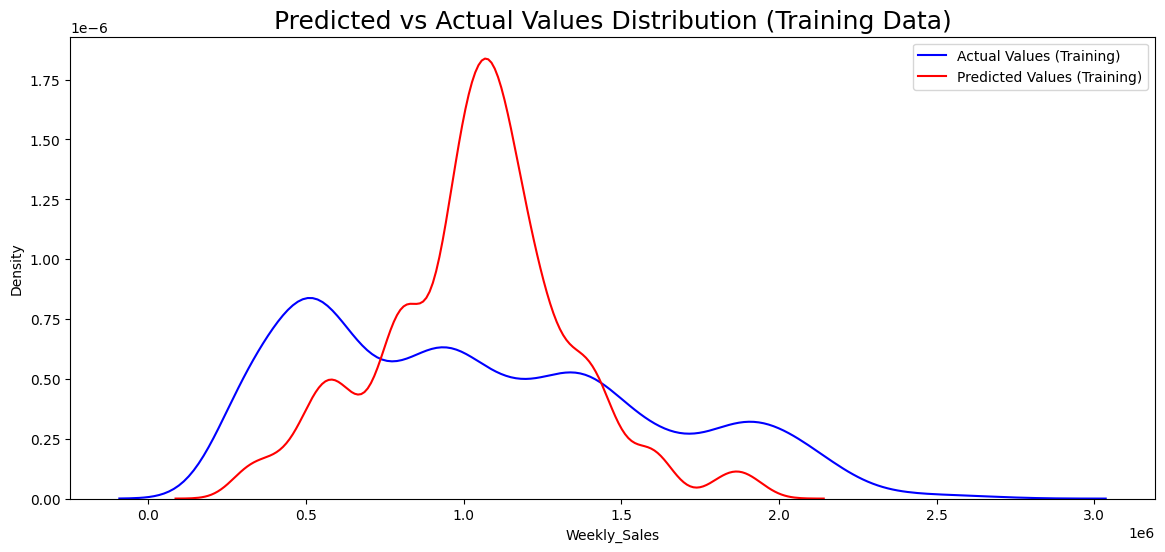

In [ ]:
Title = 'Predicted vs Actual Values Distribution (Training Data)'
Distribution_Plot(ridge_grid_search, 'Training',X_train_transformed, y_train, Title)

<ipython-input-79-badbd7f54b25>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist = False, color = "b", label = f'Actual Values ({Training_Testing})')
<ipython-input-79-badbd7f54b25>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(predicted_values, hist = F

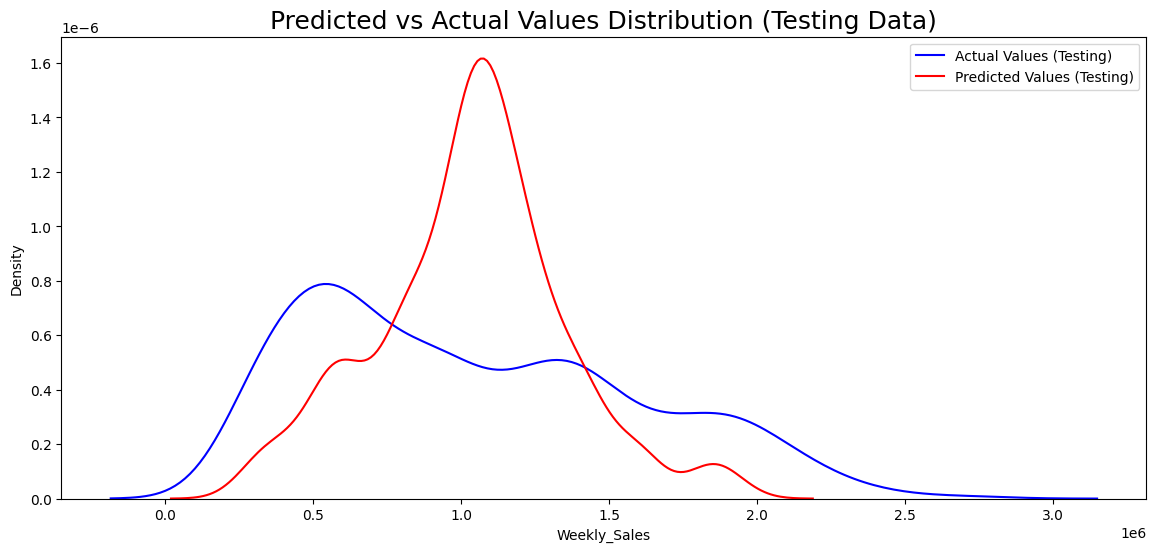

In [ ]:
Title = 'Predicted vs Actual Values Distribution (Testing Data)'
Distribution_Plot(best_ridge_model_random,'Testing', X_test_transformed, y_test, Title)

# LASSO REGRESSION

## GRID SEARCH

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
# Define the Lasso regression model
lasso_model = Lasso()

In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid_lasso = {'alpha': [0.01, 0.1, 1, 10]}

In [ ]:
# Perform grid search cross-validation
lasso_grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid_lasso, scoring='r2', cv=5)
lasso_grid_search.fit(X_train_transformed, y_train)

GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': [0.01, 0.1, 1, 10]},
             scoring='r2')

In [ ]:
cross_validation_score(lasso_grid_search, X_train_transformed, y_train)

Cross Validation Scores: [0.29158348 0.30593714 0.33081822 0.31449817 0.28893839] 

Mean of Scores: 30.64 % 

Standard Deviation of Scores: 0.015404355538661037


In [ ]:
# Get the best parameters and best score
best_params_lasso = lasso_grid_search.best_params_
best_score_lasso = lasso_grid_search.best_score_

print("Best Parameters for Lasso Regression:", best_params_lasso)
print("Best Score for Lasso Regression:", best_score_lasso)

Best Parameters for Lasso Regression: {'alpha': 10}
Best Score for Lasso Regression: 0.30635508029254577


In [ ]:
# Get the best estimator
best_lasso_model = lasso_grid_search.best_estimator_

In [ ]:
# Evaluate the best estimator
print("Training Evaluation for Lasso Regression:")
model_evaluation(best_lasso_model, 'Training', X_train_transformed, y_train)

Training Evaluation for Lasso Regression:
Training Accuracy: 
Mean Absolute Error (MAE): 358407.68
Mean Squared Error (MSE): 204470966370.87
Root Mean Squared Error (RMSE): 452184.66
R Squared (R2) score: 31.08 % 



In [ ]:
print("Testing Evaluation for Lasso Regression:")
model_evaluation(best_lasso_model, 'Testing', X_test_transformed, y_test)

Testing Evaluation for Lasso Regression:
Testing Accuracy: 
Mean Absolute Error (MAE): 362472.09
Mean Squared Error (MSE): 210919193605.71
Root Mean Squared Error (RMSE): 459259.4
R Squared (R2) score: 31.86 % 



In [ ]:
best_score = best_lasso_model.score(X_test_transformed, y_test)
print(f'Best score: {best_score}')

Best score: 0.31859001700440615


## RANDOMIZED SEARCH

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Define the Lasso regression model
lasso_model = Lasso()

In [ ]:
# Define the parameter distributions for random search
param_distributions_lasso = {'alpha': uniform(0.01, 10)}

In [ ]:
# Perform random search cross-validation
lasso_random_search = RandomizedSearchCV(estimator=lasso_model, param_distributions=param_distributions_lasso,
                                        scoring='r2', n_iter=100, cv=5, random_state=42)

lasso_random_search.fit(X_train_transformed, y_train)

RandomizedSearchCV(cv=5, estimator=Lasso(), n_iter=100,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x79f32352b880>},
                   random_state=42, scoring='r2')

In [ ]:
cross_validation_score(lasso_random_search, X_train_transformed, y_train)

Cross Validation Scores: [0.29158342 0.30593709 0.33081795 0.31449806 0.28893839] 

Mean of Scores: 30.64 % 

Standard Deviation of Scores: 0.015404270614704209


In [ ]:
# Get the best parameters and best score
best_params_lasso_random = lasso_random_search.best_params_
best_score_lasso_random = lasso_random_search.best_score_

print("Best Parameters for Lasso Regression (Random Search):", best_params_lasso_random)
print("Best Score for Lasso Regression (Random Search):", best_score_lasso_random)

Best Parameters for Lasso Regression (Random Search): {'alpha': 9.878869366005173}
Best Score for Lasso Regression (Random Search): 0.30635498180679244


In [ ]:
# Get the best estimator
best_lasso_model_random = lasso_random_search.best_estimator_

In [ ]:
# Evaluate the best estimator
print("Training Evaluation for Lasso Regression (Random Search):")
model_evaluation(best_lasso_model_random, 'Training', X_train_transformed, y_train)

Training Evaluation for Lasso Regression (Random Search):
Training Accuracy: 
Mean Absolute Error (MAE): 358407.67
Mean Squared Error (MSE): 204470966241.68
Root Mean Squared Error (RMSE): 452184.66
R Squared (R2) score: 31.08 % 



In [ ]:
print("Testing Evaluation for Lasso Regression (Random Search):")
model_evaluation(best_lasso_model_random, 'Testing', X_test_transformed, y_test)

Testing Evaluation for Lasso Regression (Random Search):
Testing Accuracy: 
Mean Absolute Error (MAE): 362472.07
Mean Squared Error (MSE): 210919212014.84
Root Mean Squared Error (RMSE): 459259.42
R Squared (R2) score: 31.86 % 



In [ ]:
best_score = best_lasso_model_random.score(X_test_transformed, y_test)
print(f'Best score: {best_score}')

Best score: 0.3185899575305948


<ipython-input-79-badbd7f54b25>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist = False, color = "b", label = f'Actual Values ({Training_Testing})')
<ipython-input-79-badbd7f54b25>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(predicted_values, hist = F

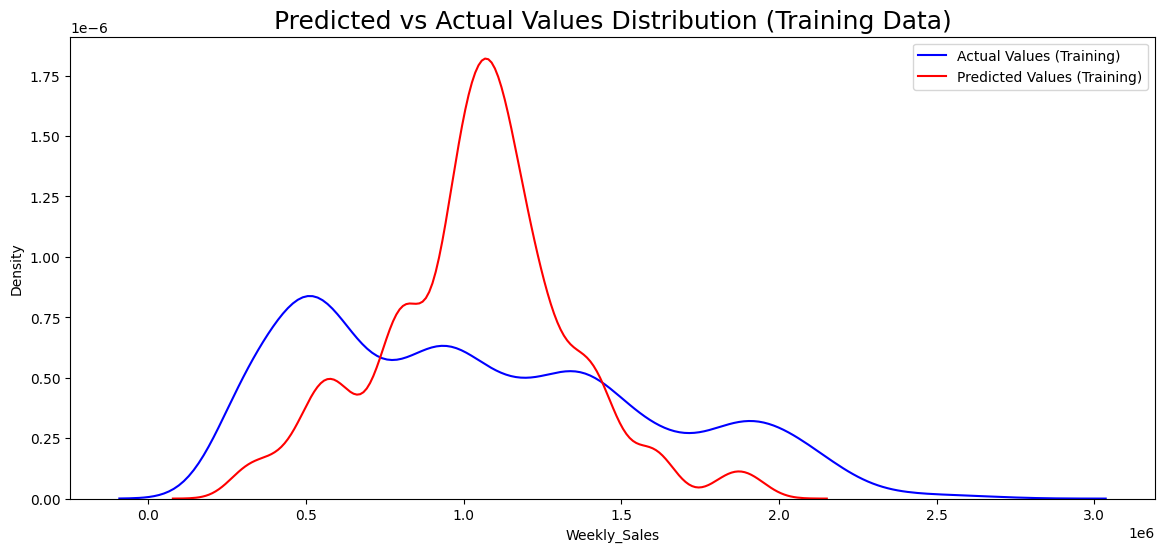

In [ ]:
Title = 'Predicted vs Actual Values Distribution (Training Data)'
Distribution_Plot(best_lasso_model, 'Training',X_train_transformed, y_train, Title)

<ipython-input-79-badbd7f54b25>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist = False, color = "b", label = f'Actual Values ({Training_Testing})')
<ipython-input-79-badbd7f54b25>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(predicted_values, hist = F

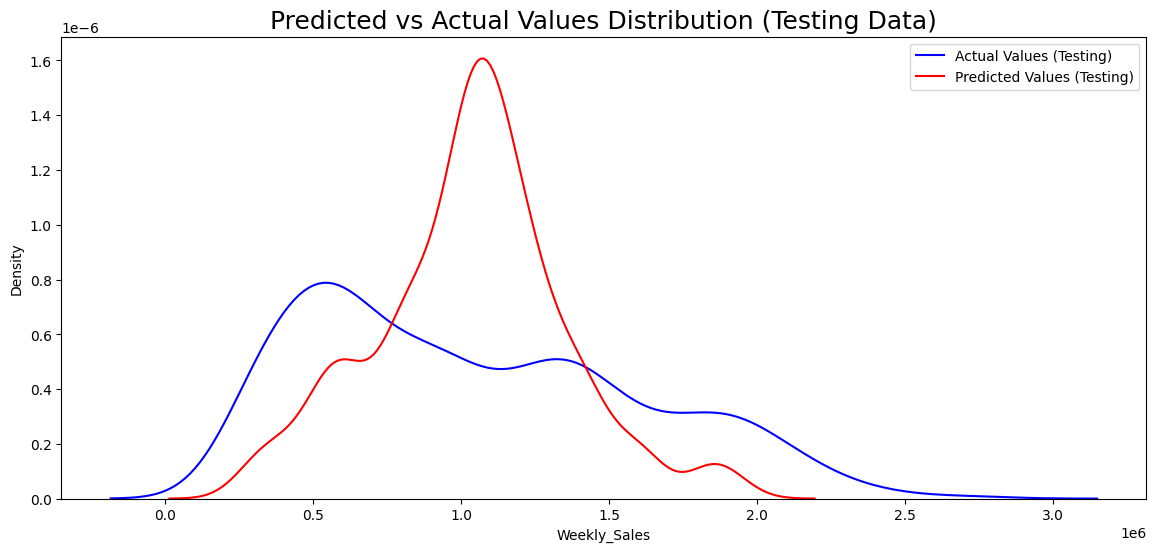

In [ ]:
Title = 'Predicted vs Actual Values Distribution (Testing Data)'
Distribution_Plot(best_lasso_model,'Testing', X_test_transformed, y_test, Title)

----
----
# DECISION TREE REGRESSOR

In [ ]:
# Importing necessary libraries
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Defining features and target variable
X = df1.drop('Weekly_Sales', axis=1)
y = df1['Weekly_Sales']

In [ ]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Creating and fitting the Decision Tree model
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

## GRID SEARCH

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define the hyperparameters grid
param_grid = {
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],     # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2', None]  # Number of features to consider when looking for the best split
}

In [ ]:
# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='r2',  # Evaluation metric
                           cv=5,          # Cross-validation folds
                           verbose=1,     # Verbosity level
                           n_jobs=-1)     # Use all available CPU cores

# Fit GridSearchCV to training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2', verbose=1)

In [ ]:
# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10}


In [ ]:
# Get the best model
best_decision_tree = grid_search.best_estimator_

In [ ]:
cross_validation_score(best_decision_tree, X_train_transformed, y_train)

Cross Validation Scores: [0.90518278 0.90986128 0.93470001 0.91895979 0.9372154 ] 

Mean of Scores: 92.12 % 

Standard Deviation of Scores: 0.012875390619396312


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

In [ ]:
# Get the best parameters and best score
best_dt_param = grid_search.best_params_
best_dt_score = grid_search.best_score_

print("Best Parameters for Decision Tree Model:", best_dt_param)
print("Best Score for Decision Tree Model:", best_dt_score)
# scoring metric used for model evaluation is such that lower values are better

Best Parameters for Decision Tree Model: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Score for Decision Tree Model: 0.9643953796792157


In [ ]:
# Evaluate the best model
print("\nEvaluation of the Best Decision Tree Model:")
model_evaluation(best_decision_tree, 'Training', X_train, y_train)


Evaluation of the Best Decision Tree Model:
Training Accuracy: 
Mean Absolute Error (MAE): 27113.33
Mean Squared Error (MSE): 2256760434.69
Root Mean Squared Error (RMSE): 47505.37
R Squared (R2) score: 99.24 % 



In [ ]:
model_evaluation(best_decision_tree, 'Testing', X_test, y_test)

Testing Accuracy: 
Mean Absolute Error (MAE): 59095.59
Mean Squared Error (MSE): 8772553461.59
Root Mean Squared Error (RMSE): 93661.91
R Squared (R2) score: 97.17 % 



In [ ]:
best_score = best_decision_tree.score(X_test, y_test)
print(f'Best score: {best_score}')

Best score: 0.9716587883591725


## RANDOMIZED SEARCH

In [ ]:
# Define the hyperparameters grid
param_grid = {
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],     # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2', None]  # Number of features to consider when looking for the best split
}

In [ ]:
# Create random_search instance
random_search = RandomizedSearchCV(estimator=DecisionTreeRegressor(), param_distributions=param_grid,
                           scoring='r2', cv=5, verbose=1, n_jobs=1)

# Fit random_search to training data
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   scoring='r2', verbose=1)

In [ ]:
# Print the best hyperparameters found
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 30}


In [ ]:
# Get the best model
best_decision_tree = random_search.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

Best Hyperparameters: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None}


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


In [ ]:
cross_validation_score(best_decision_tree, X_train_transformed, y_train)

Cross Validation Scores: [0.90559676 0.9078099  0.93505807 0.91589648 0.93687733] 

Mean of Scores: 92.02 % 

Standard Deviation of Scores: 0.013297924573306235


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

In [ ]:
# Get the best parameters and best score
best_dt_param = random_search.best_params_
best_dt_score = random_search.best_score_

print("Best Parameters for Decision Tree Model:", best_dt_param)
print("Best Score for Decision Tree Model:", best_dt_score)
# scoring metric used for model evaluation is such that lower values are better

Best Parameters for Decision Tree Model: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None}
Best Score for Decision Tree Model: 0.9642878291053524


In [ ]:
# Evaluate the best model
print("\nEvaluation of the Best Decision Tree Model:")
model_evaluation(best_decision_tree, 'Training', X_train, y_train)


Evaluation of the Best Decision Tree Model:
Training Accuracy: 
Mean Absolute Error (MAE): 27000.89
Mean Squared Error (MSE): 2244776329.23
Root Mean Squared Error (RMSE): 47379.07
R Squared (R2) score: 99.24 % 



In [ ]:
model_evaluation(best_decision_tree, 'Testing', X_test, y_test)

Testing Accuracy: 
Mean Absolute Error (MAE): 58455.51
Mean Squared Error (MSE): 8504454530.09
Root Mean Squared Error (RMSE): 92219.6
R Squared (R2) score: 97.25 % 



In [ ]:
best_score = best_decision_tree.score(X_test, y_test)
print(f'Best score: {best_score}')

Best score: 0.9725249271170097


# OVERFITTING

In [ ]:
y_train_pred = decision_tree.predict(X_train)
y_test_pred = decision_tree.predict(X_test)

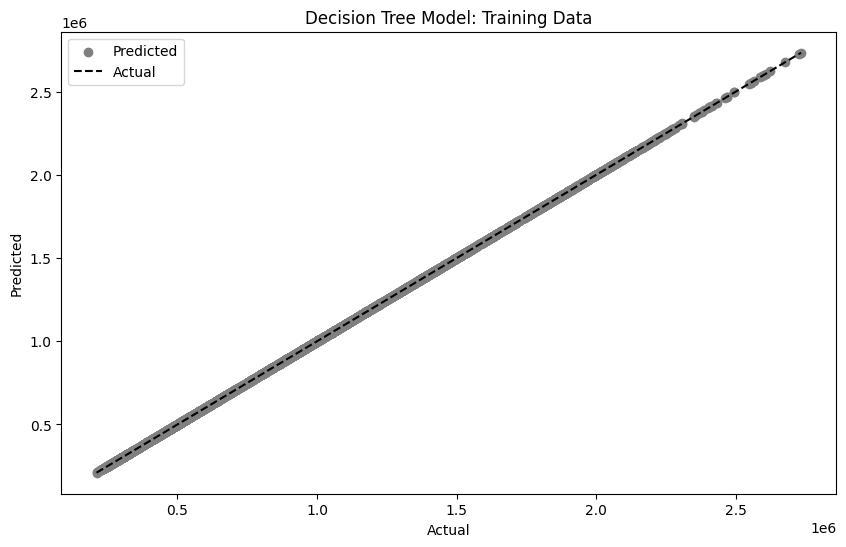

In [ ]:
#  Plotting predicted vs. actual values for training data
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='gray', label='Predicted')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--', color='black', label='Actual')
plt.title('Decision Tree Model: Training Data')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

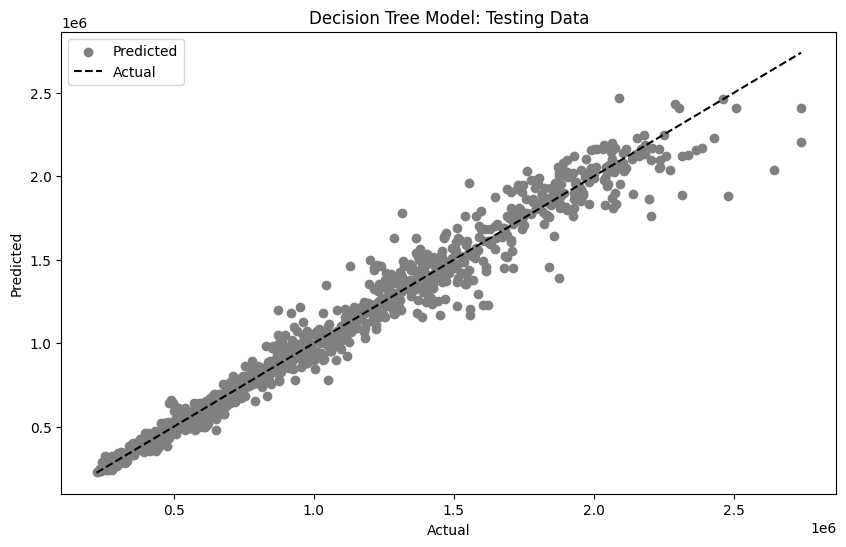

In [ ]:
# Plotting predicted vs. actual values for testing data
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='gray', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='black', label='Actual')
plt.title('Decision Tree Model: Testing Data')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

<ipython-input-79-badbd7f54b25>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist = False, color = "b", label = f'Actual Values ({Training_Testing})')
<ipython-input-79-badbd7f54b25>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(predicted_values, hist = F

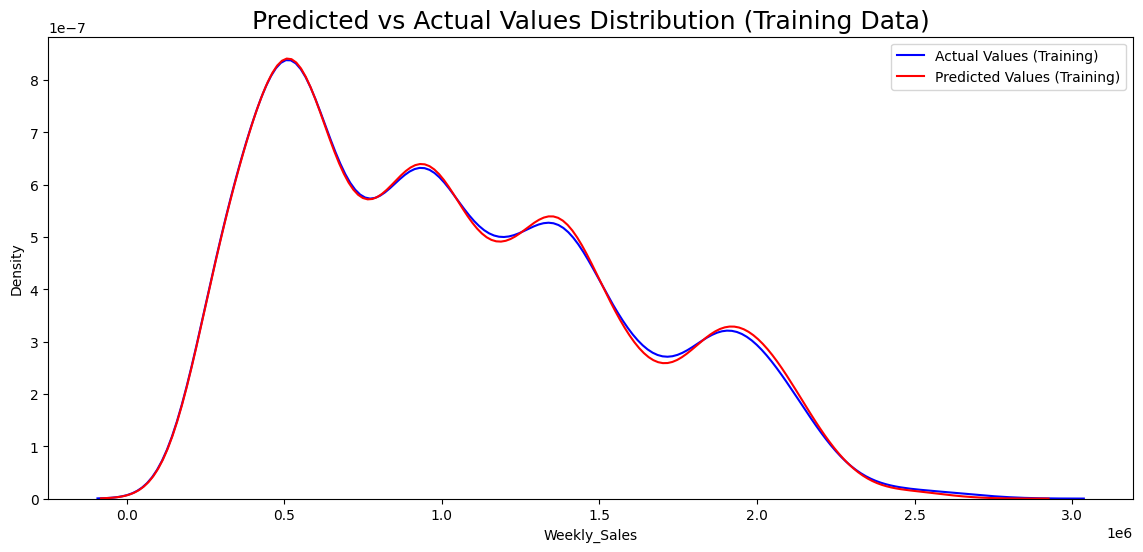

In [ ]:
Title = 'Predicted vs Actual Values Distribution (Training Data)'
Distribution_Plot(best_decision_tree, 'Training',X_train, y_train, Title)

<ipython-input-79-badbd7f54b25>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist = False, color = "b", label = f'Actual Values ({Training_Testing})')
<ipython-input-79-badbd7f54b25>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(predicted_values, hist = F

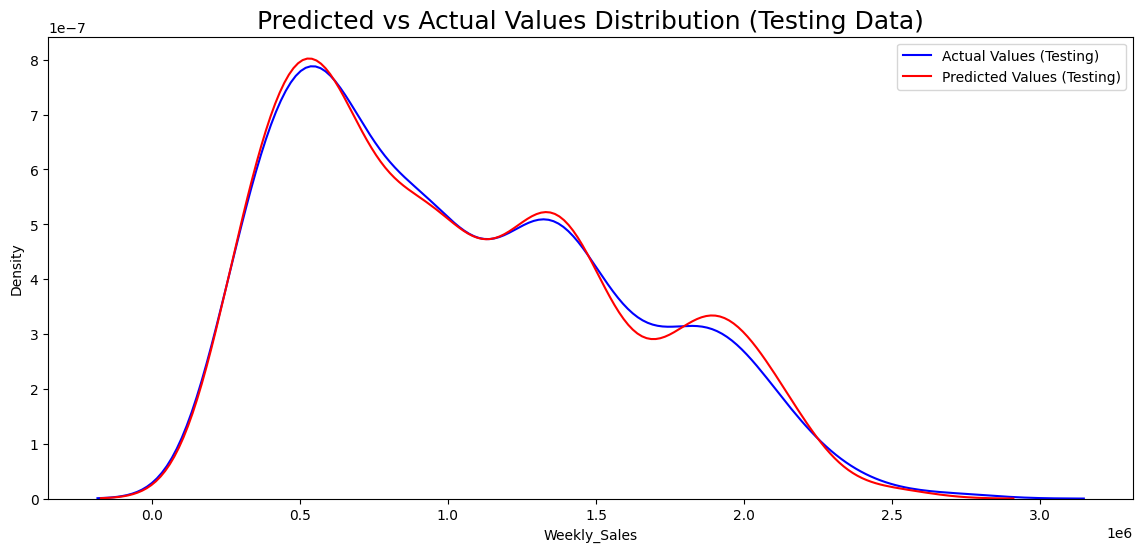

In [ ]:
Title = 'Predicted vs Actual Values Distribution (Testing Data)'
Distribution_Plot(best_decision_tree,'Testing', X_test, y_test, Title)

----
----
# RANDOM FOREST REGRESSOR

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
random_forest_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('random_forest', RandomForestRegressor(random_state=42))
])

## GRID SEARCH

In [ ]:
param_grid = {
    'random_forest__n_estimators': [20, 50, 100],
    'random_forest__max_depth': [None, 5, 10, 20],
    'random_forest__min_samples_split': [2, 5, 10],
    'random_forest__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(random_forest_pipe, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_features',
                                                                         StandardScaler(),
                                                                         ['Temperature',
                                                                          'Fuel_Price',
                                                                          'CPI',
                                                                          'Unemployment']),
                                                                        ('cat_features',
                                                                         BinaryEncoder(),
                                                                         ['Store',
                                                                          'Holiday_Flag',
                                                                          'week'])])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'random_forest__max_depth': [None, 5, 10, 20],
                         'random_forest__min_samples_leaf': [1, 2, 4],
                         'random_forest__min_samples_split': [2, 5, 10],
                         'random_forest__n_estimators': [20, 50, 100]},
             scoring='r2')

In [ ]:
# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best parameters:", best_params)
print("Best score:", best_score)

Best parameters: {'random_forest__max_depth': 20, 'random_forest__min_samples_leaf': 1, 'random_forest__min_samples_split': 2, 'random_forest__n_estimators': 100}
Best score: 0.9493187850429937


In [ ]:
# Train the Random Forest model with the best parameters
best_random_forest = grid_search.best_estimator_
best_random_forest.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_features',
                                                  StandardScaler(),
                                                  ['Temperature', 'Fuel_Price',
                                                   'CPI', 'Unemployment']),
                                                 ('cat_features',
                                                  BinaryEncoder(),
                                                  ['Store', 'Holiday_Flag',
                                                   'week'])])),
                ('random_forest',
                 RandomForestRegressor(max_depth=20, random_state=42))])

In [ ]:
cross_validation_score(best_random_forest, X_train, y_train)

Cross Validation Scores: [0.9536918  0.93251829 0.95634499 0.94630805 0.9577308 ] 

Mean of Scores: 94.93 % 

Standard Deviation of Scores: 0.009279805685658456


In [ ]:
# Evaluation on training data
model_evaluation(best_random_forest, 'Training', X_train, y_train)

Training Accuracy: 
Mean Absolute Error (MAE): 24055.94
Mean Squared Error (MSE): 1802225821.92
Root Mean Squared Error (RMSE): 42452.63
R Squared (R2) score: 99.39 % 



In [ ]:
# Evaluation on testing data
model_evaluation(best_random_forest, 'Testing', X_test, y_test)

Testing Accuracy: 
Mean Absolute Error (MAE): 64607.3
Mean Squared Error (MSE): 13365236840.7
Root Mean Squared Error (RMSE): 115608.12
R Squared (R2) score: 95.68 % 



In [ ]:
best_score = best_random_forest.score(X_test, y_test)
print(f'Best score: {best_score}')

Best score: 0.9568213510934561


## RANDOMIZED SEARCH

In [ ]:
# Define the parameter grid for random search
param_grid = {
    'random_forest__n_estimators': [20, 50, 100],
    'random_forest__max_depth': [None, 5, 10, 20],
    'random_forest__min_samples_split': [2, 5, 10],
    'random_forest__min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Perform random search
random_search = RandomizedSearchCV(estimator=random_forest_pipe, param_distributions=param_grid,
                                   scoring='r2', n_iter=10, cv=5, verbose=1)

# Fit the random search to the training data
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num_features',
                                                                               StandardScaler(),
                                                                               ['Temperature',
                                                                                'Fuel_Price',
                                                                                'CPI',
                                                                                'Unemployment']),
                                                                              ('cat_features',
                                                                               BinaryEncoder(),
                                                                               ['Store',
                                                                                'Holiday_Flag',
                                                                                'week'])])),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'random_forest__max_depth': [None, 5,
                                                                     10, 20],
                                        'random_forest__min_samples_leaf': [1,
                                                                            2,
                                                                            4],
                                        'random_forest__min_samples_split': [2,
                                                                             5,
                                                                             10],
                                        'random_forest__n_estimators': [20, 50,
                                                                        100]},
                   scoring='r2', verbose=1)

In [ ]:
# Cross-validation score
cross_validation_score(random_search, X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Cross Validation Scores: [0.95358557 0.92918426 0.95768107 0.94719687 0.95652106] 

Mean of Scores: 94.88 % 

Standard Deviation of Scores: 0.010475983993991932


In [ ]:
# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)

Best parameters: {'random_forest__n_estimators': 20, 'random_forest__min_samples_split': 10, 'random_forest__min_samples_leaf': 1, 'random_forest__max_depth': 20}
Best score: 0.9479504092009275


In [ ]:
# Get the best estimator
best_random_forest = random_search.best_estimator_

In [ ]:
# Evaluate the best estimator on training data
model_evaluation(best_random_forest, 'Training', X_train, y_train)

Training Accuracy: 
Mean Absolute Error (MAE): 41613.02
Mean Squared Error (MSE): 5498679478.16
Root Mean Squared Error (RMSE): 74153.08
R Squared (R2) score: 98.15 % 



In [ ]:
# Evaluate the best estimator on testing data
model_evaluation(best_random_forest, 'Testing', X_test, y_test)

Testing Accuracy: 
Mean Absolute Error (MAE): 67472.04
Mean Squared Error (MSE): 14545899543.47
Root Mean Squared Error (RMSE): 120606.38
R Squared (R2) score: 95.3 % 



In [ ]:
best_score = best_random_forest.score(X_test, y_test)
print(f'Best score: {best_score}')

Best score: 0.953007021356712


<ipython-input-79-badbd7f54b25>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist = False, color = "b", label = f'Actual Values ({Training_Testing})')
<ipython-input-79-badbd7f54b25>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(predicted_values, hist = F

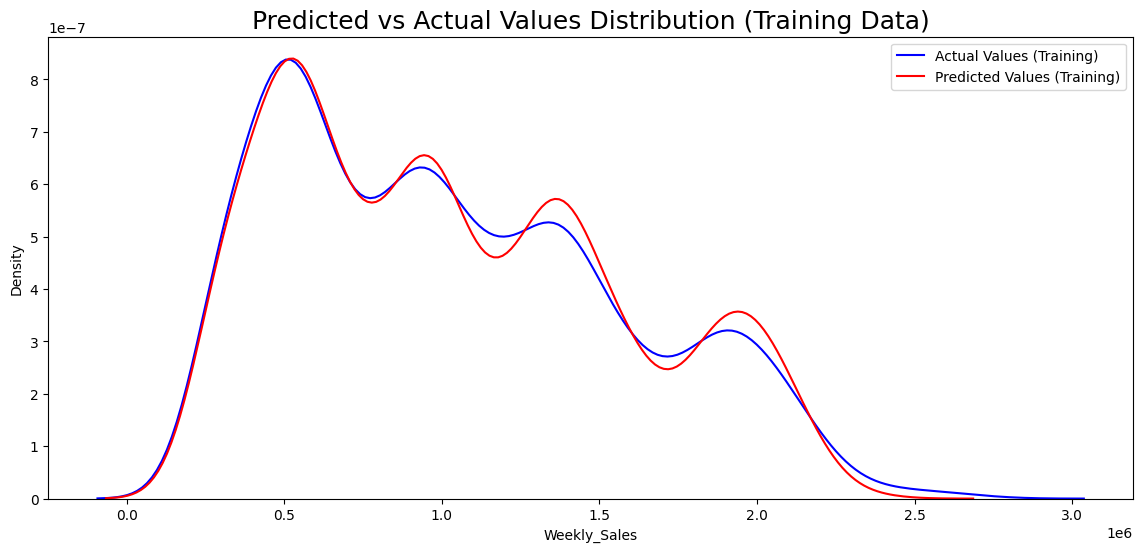

In [ ]:
Title = 'Predicted vs Actual Values Distribution (Training Data)'
Distribution_Plot(best_random_forest, 'Training',X_train, y_train, Title)

<ipython-input-79-badbd7f54b25>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist = False, color = "b", label = f'Actual Values ({Training_Testing})')
<ipython-input-79-badbd7f54b25>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(predicted_values, hist = F

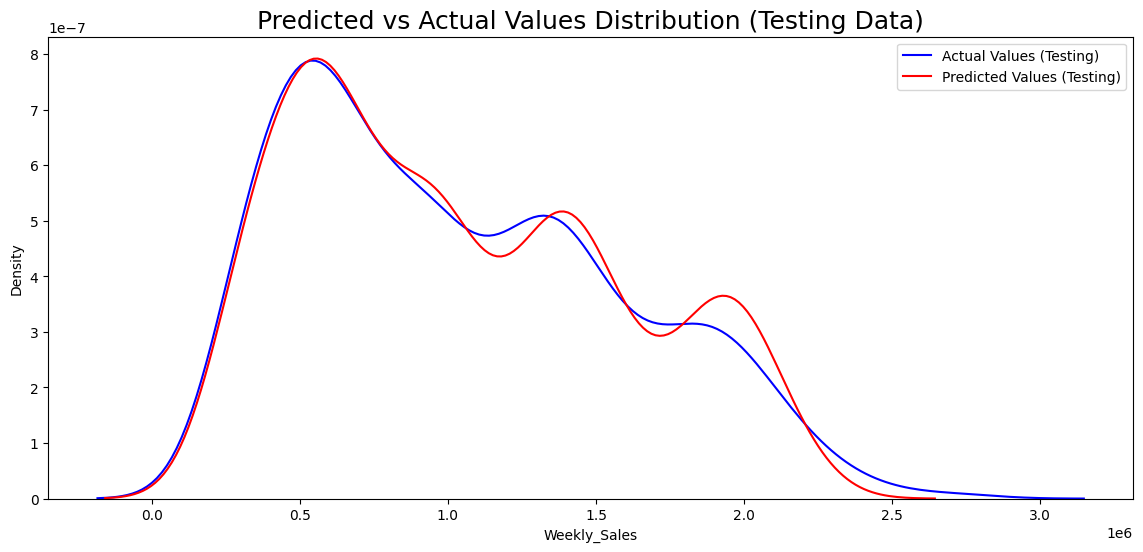

In [ ]:
Title = 'Predicted vs Actual Values Distribution (Testing Data)'
Distribution_Plot(best_random_forest,'Testing', X_test, y_test, Title)

----
----
# KNN REGRESSOR

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

## GRID SEARCH

In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [1000],  # Only consider 45 as the number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting scheme for neighbors
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

In [ ]:
# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train_transformed, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1000],
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [ ]:
cross_validation_score(grid_search, X_train_transformed, y_train)

Cross Validation Scores: [0.1516626  0.15198546 0.16709254 0.15902533 0.15407212] 

Mean of Scores: 15.68 % 

Standard Deviation of Scores: 0.005794778790325061


In [ ]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 1000, 'weights': 'distance'}
Best Score: 0.15676760846467325


In [ ]:
# Get the best estimator
best_knn_regressor = grid_search.best_estimator_

In [ ]:
# Define the KNN regressor with the best parameters
best_knn_regressor = KNeighborsRegressor(n_neighbors=45, weights='uniform', metric='euclidean')

# Fit the KNN regressor to the training data
best_knn_regressor.fit(X_train_transformed, y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=45)

In [ ]:
# Evaluate the model
print("Training Evaluation:")
model_evaluation(best_knn_regressor, 'Training', X_train_transformed, y_train)

Training Evaluation:
Training Accuracy: 
Mean Absolute Error (MAE): 246614.87
Mean Squared Error (MSE): 101506755882.72
Root Mean Squared Error (RMSE): 318601.25
R Squared (R2) score: 65.78 % 



In [ ]:
print("Testing Evaluation:")
model_evaluation(best_knn_regressor, 'Testing', X_test_transformed, y_test)

Testing Evaluation:
Testing Accuracy: 
Mean Absolute Error (MAE): 256808.54
Mean Squared Error (MSE): 110053791468.37
Root Mean Squared Error (RMSE): 331743.56
R Squared (R2) score: 64.45 % 



In [ ]:
best_score = best_knn_regressor.score(X_test_transformed, y_test)
print(f'Best score: {best_score}')

Best score: 0.6444526887711728


## RANDOMIZED SEARCH

In [ ]:
# Perform random search and find the best combination of hyperparameters
random_search = RandomizedSearchCV(estimator=KNeighborsRegressor(), param_distributions=param_grid,
                                    scoring='r2', n_iter=10, cv=5, verbose=1, random_state=42)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'metric': ['euclidean', 'manhattan'],
                                        'n_neighbors': [1000],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='r2', verbose=1)

In [ ]:
cross_validation_score(random_search, X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Cross Validation Scores: [0.18033772 0.17104857 0.17972659 0.18749202 0.17311805] 

Mean of Scores: 17.83 % 

Standard Deviation of Scores: 0.0058327818274723515


In [ ]:
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'weights': 'distance', 'n_neighbors': 1000, 'metric': 'manhattan'}
Best Score: 0.1783445904351755


In [ ]:
# Define the KNN regressor with the best parameters
best_knn_regressor = KNeighborsRegressor(n_neighbors=45, weights='uniform', metric='euclidean')

# Fit the KNN regressor to the training data
best_knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=45)

In [ ]:
# Evaluate the model
print("Training Evaluation:")
model_evaluation(best_knn_regressor, 'Training', X_train, y_train)

Training Evaluation:
Training Accuracy: 
Mean Absolute Error (MAE): 346471.61
Mean Squared Error (MSE): 178306750577.2
Root Mean Squared Error (RMSE): 422263.84
R Squared (R2) score: 39.9 % 



In [ ]:
print("Testing Evaluation:")
model_evaluation(best_knn_regressor, 'Testing', X_test, y_test)

Testing Evaluation:
Testing Accuracy: 
Mean Absolute Error (MAE): 358868.73
Mean Squared Error (MSE): 192819516586.96
Root Mean Squared Error (RMSE): 439112.19
R Squared (R2) score: 37.71 % 



In [ ]:
best_score = best_knn_regressor.score(X_test, y_test)
print(f'Best score: {best_score}')

Best score: 0.37706407239371575


<ipython-input-79-badbd7f54b25>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist = False, color = "b", label = f'Actual Values ({Training_Testing})')
<ipython-input-79-badbd7f54b25>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(predicted_values, hist = F

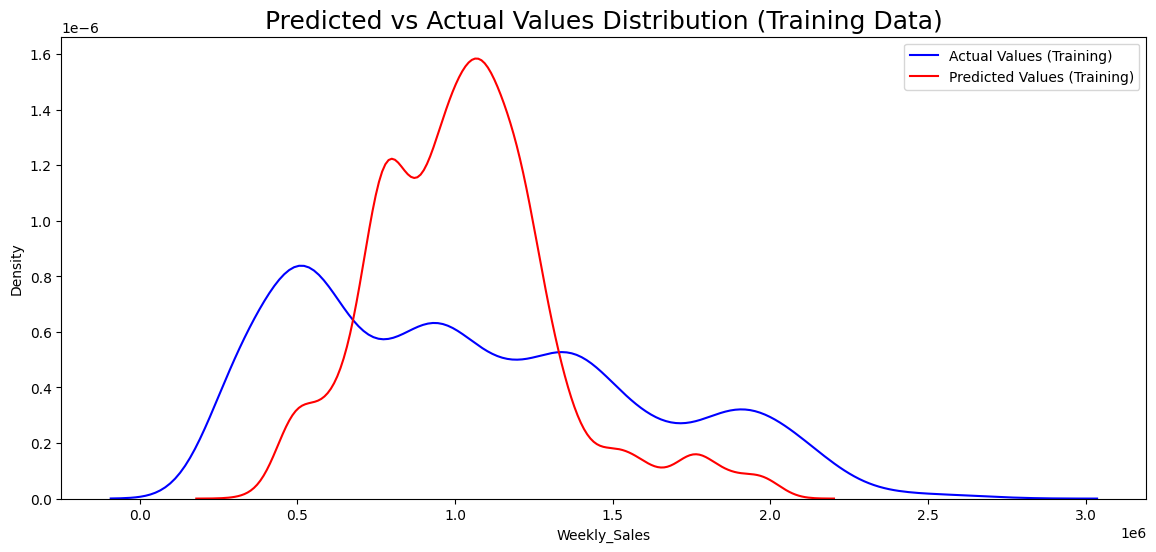

In [ ]:
Title = 'Predicted vs Actual Values Distribution (Training Data)'
Distribution_Plot(best_knn_regressor, 'Training',X_train, y_train, Title)

<ipython-input-79-badbd7f54b25>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist = False, color = "b", label = f'Actual Values ({Training_Testing})')
<ipython-input-79-badbd7f54b25>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(predicted_values, hist = F

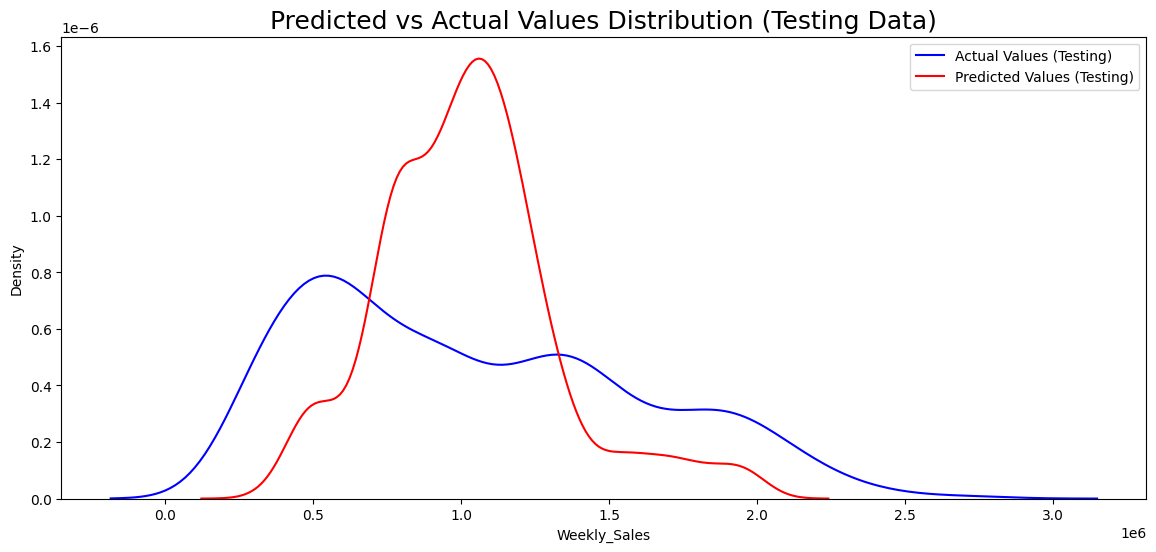

In [ ]:
Title = 'Predicted vs Actual Values Distribution (Testing Data)'
Distribution_Plot(best_knn_regressor,'Testing', X_test, y_test, Title)

---
---
# XGB Regressor
## GRID SEARCH

In [ ]:
from xgboost import XGBRegressor

In [ ]:
# Define the XGBRegressor model
xgb_reg = XGBRegressor()

In [ ]:
# Define the reduced parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4],
    'min_child_weight': [1, 3],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.7, 0.8]
}

In [ ]:
# Perform hyperparameter tuning using Grid Search
grid_search = GridSearchCV(estimator=xgb_reg,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',  # Use negative MSE for scoring
                           cv=5)
grid_search.fit(X_train_transformed, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'colsample_bytree': [0.7, 0.8],
                         'learning_rate': [0.05, 0.1], 'max_depth': [3, 4],
                         'min_child_weight': [1, 3], 'n_estimators': [100, 200],
                         'subsample': [0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
cross_validation_score(grid_search, X_train_transformed, y_train)

Cross Validation Scores: [0.95578858 0.94019187 0.95366622 0.95650701 0.95738227] 

Mean of Scores: 95.27 % 

Standard Deviation of Scores: 0.006377194943648634


In [ ]:
# Get the best estimator
best_xgb_reg_grid_search = grid_search.best_estimator_

In [ ]:
y_pred_grid_search = best_xgb_reg_grid_search.predict(X_test_transformed)

In [ ]:
model_evaluation(best_xgb_reg_grid_search, 'Training', X_train_transformed, y_train)

Training Accuracy: 
Mean Absolute Error (MAE): 65424.52
Mean Squared Error (MSE): 9102237939.09
Root Mean Squared Error (RMSE): 95405.65
R Squared (R2) score: 96.93 % 



In [ ]:
model_evaluation(best_xgb_reg_grid_search, 'Testing', X_test_transformed, y_test)

Testing Accuracy: 
Mean Absolute Error (MAE): 75429.65
Mean Squared Error (MSE): 12495116665.71
Root Mean Squared Error (RMSE): 111781.56
R Squared (R2) score: 95.96 % 



In [ ]:
# Calculate accuracy
threshold = 0.1  # Define threshold for accuracy calculation
accuracy_grid_search = np.mean(np.abs((y_test - y_pred_grid_search) / y_test) < threshold) * 100  # Calculate accuracy as a percentage
print("Accuracy:", accuracy_grid_search, "%")

Accuracy: 72.13541666666666 %


In [ ]:
# Evaluate the best estimator
best_score = best_xgb_reg_grid_search.score(X_test_transformed, y_test)
print(f'Best score: {best_score}')

Best score: 0.959632420885195


## RANDOMIZED SEARCH

In [ ]:
# Perform hyperparameter tuning using Random Search
best_xgb_reg_random_search = hyperparameter_tuning_random(estimator=xgb_reg,
                                                          X_train=X_train_transformed,
                                                          y_train=y_train,
                                                          param_distributions=param_grid,
                                                          cv=5)  # Set cv to 5 for example

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:58:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:58:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:58:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:58:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/loc

Best parameters: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20} 

Best score: 0.9412573132254733


In [ ]:
cross_validation_score(best_xgb_reg_random_search, X_train_transformed, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:59:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:59:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:59:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:59:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/loc

Cross Validation Scores: [0.94578751 0.91877578 0.94679122 0.94942681 0.94550525] 

Mean of Scores: 94.13 % 

Standard Deviation of Scores: 0.011325651763664684


In [ ]:
# Evaluate the model
y_pred_random_search = best_xgb_reg_random_search.predict(X_test_transformed)

In [ ]:
model_evaluation(best_xgb_reg_random_search, 'Training', X_train_transformed, y_train)

Training Accuracy: 
Mean Absolute Error (MAE): 0.09
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.12
R Squared (R2) score: 100.0 % 



In [ ]:
model_evaluation(best_xgb_reg_random_search, 'Testing', X_test_transformed, y_test)

Testing Accuracy: 
Mean Absolute Error (MAE): 67314.04
Mean Squared Error (MSE): 14803432662.7
Root Mean Squared Error (RMSE): 121669.36
R Squared (R2) score: 95.22 % 



In [ ]:
# Calculate accuracy
threshold = 0.1  # Define threshold for accuracy calculation
accuracy_random_search = np.mean(np.abs((y_test - y_pred_random_search) / y_test) < threshold) * 100  # Calculate accuracy as a percentage
print("Accuracy:", accuracy_random_search, "%")

Accuracy: 82.55208333333334 %


In [ ]:
# Evaluate the best estimator
best_score = best_xgb_reg_random_search.score(X_test_transformed, y_test)
print(f'Best score: {best_score}')

Best score: 0.9521750172351449


<ipython-input-79-badbd7f54b25>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist = False, color = "b", label = f'Actual Values ({Training_Testing})')
<ipython-input-79-badbd7f54b25>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(predicted_values, hist = F

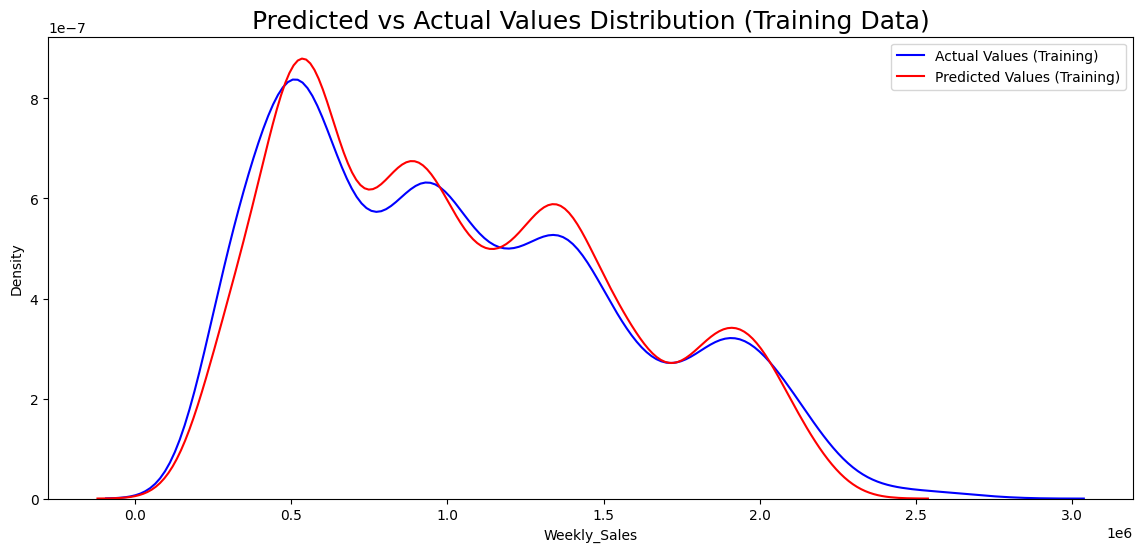

In [ ]:
Title = 'Predicted vs Actual Values Distribution (Training Data)'
Distribution_Plot(best_xgb_reg_grid_search, 'Training',X_train_transformed, y_train, Title)

<ipython-input-79-badbd7f54b25>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist = False, color = "b", label = f'Actual Values ({Training_Testing})')
<ipython-input-79-badbd7f54b25>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(predicted_values, hist = F

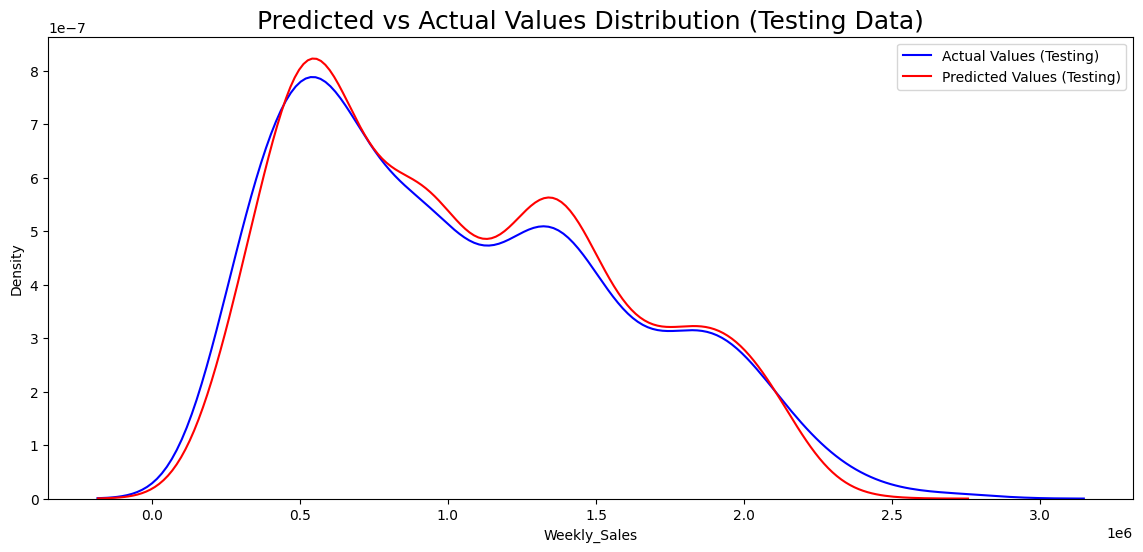

In [ ]:
Title = 'Predicted vs Actual Values Distribution (Testing Data)'
Distribution_Plot(best_xgb_reg_grid_search, 'Testing',X_test_transformed, y_test, Title)

----
----
# K-MEANS

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Instantiate KMeans
kmeans = KMeans(n_clusters=45, random_state=42)

# Fit KMeans to the data
kmeans.fit(X_train_transformed)

# Get cluster labels
cluster_labels = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


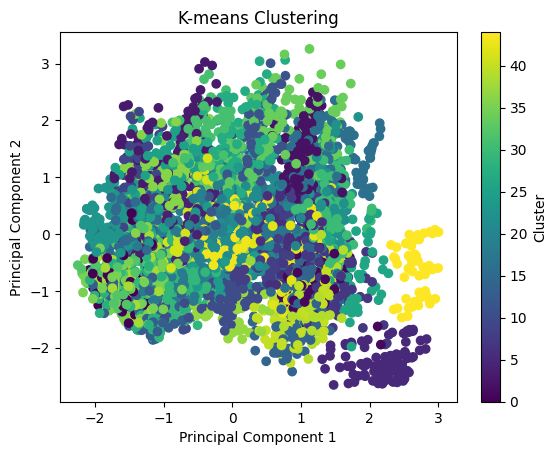

In [ ]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_transformed)

# Visualize clusters
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
inertia = kmeans.inertia_
print("Inertia:", inertia)

Inertia: 12026.78347351278


In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score_value = silhouette_score(X_train_transformed, cluster_labels)
print("Silhouette Score:", silhouette_score_value)

Silhouette Score: 0.11671151822768389


----
----
# HIERACHICAL CLUSTERING

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

In [ ]:
# Define the AgglomerativeClustering model
hierarchical_clustering = AgglomerativeClustering()

In [ ]:
# Fit the model to the data
hierarchical_clustering.fit(X_train_transformed)

AgglomerativeClustering()

In [ ]:
# Predict cluster labels
cluster_labels = hierarchical_clustering.labels_

In [ ]:
# Evaluate the clustering using silhouette score
silhouette_avg = silhouette_score(X_train_transformed, cluster_labels)
print("Silhouette Score:", silhouette_avg)

#lower the Silhoutee score indicates clusters are well seperated and high intra cluster similarity

Silhouette Score: 0.15918401335891572


In [ ]:
# Perform hierarchical clustering
Z = linkage(X_train_transformed, method='ward')  # X_train_transformed represents your transformed training data

In [ ]:
# Calculate cophenetic correlation coefficient
c, coph_dists = cophenet(Z, pdist(X_train_transformed))

print("Cophenetic Correlation Coefficient:", c)

Cophenetic Correlation Coefficient: 0.5210658972678718


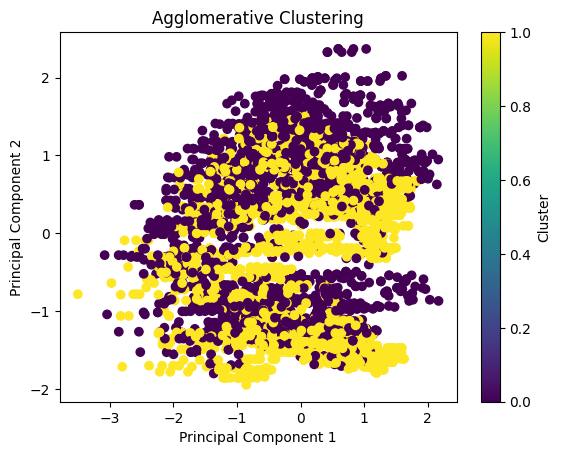

In [ ]:
# Visualize clusters
plt.scatter(X_train_transformed[:, 0], X_train_transformed[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

----
----
# NEURAL NETWORKS - MULTI LAYER PERCEPTRON (MLP)


In [ ]:
!pip install keras

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

In [ ]:
# Build the MLP model
model = Sequential()
model.add(Flatten(input_shape=(X_train_transformed.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

In [ ]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
Mdl = model.fit(X_train_transformed, y_train, epochs=50, batch_size=32, validation_split=0.5, verbose=1)

# Evaluate the model on the test set
loss = model.evaluate(X_test_transformed, y_test)
print("Test Loss:", loss)

Epoch 1/50
72/72 [==============================] - 2s 12ms/step - loss: 288046972928.0000 - val_loss: 275970064384.0000
Epoch 2/50
72/72 [==============================] - 1s 15ms/step - loss: 286733369344.0000 - val_loss: 274875842560.0000
Epoch 3/50
72/72 [==============================] - 1s 9ms/step - loss: 285545398272.0000 - val_loss: 273812668416.0000
Epoch 4/50
72/72 [==============================] - 1s 11ms/step - loss: 284297265152.0000 - val_loss: 272729309184.0000
Epoch 5/50
72/72 [==============================] - 1s 10ms/step - loss: 283081310208.0000 - val_loss: 271641067520.0000
Epoch 6/50
72/72 [==============================] - 1s 12ms/step - loss: 281909592064.0000 - val_loss: 270540357632.0000
Epoch 7/50
72/72 [==============================] - 1s 12ms/step - loss: 280667947008.0000 - val_loss: 269434667008.0000
Epoch 8/50
72/72 [==============================] - 1s 17ms/step - loss: 279530504192.0000 - val_loss: 268409651200.0000
Epoch 9/50
72/72 [===============

In [ ]:
# Predictions
y_pred = model.predict(X_test_transformed).flatten()  # Flatten y_pred to make it 1-dimensional

36/36 [==============================] - 0s 1ms/step


In [ ]:
model_evaluation(model, 'Training', X_train_transformed, y_train)

144/144 [==============================] - 0s 1ms/step
Training Accuracy: 
Mean Absolute Error (MAE): 436710.29
Mean Squared Error (MSE): 282714664199.16
Root Mean Squared Error (RMSE): 531709.19
R Squared (R2) score: 4.7 % 



In [ ]:
model_evaluation(model, 'Testing', X_test_transformed, y_test)

36/36 [==============================] - 0s 1ms/step
Testing Accuracy: 
Mean Absolute Error (MAE): 442863.72
Mean Squared Error (MSE): 291941102291.95
Root Mean Squared Error (RMSE): 540315.74
R Squared (R2) score: 5.68 % 



In [ ]:
# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Percentage Error (MAPE): 64.04181214219295


In [ ]:
# Define a threshold for accuracy
threshold = 0.1  # For example, consider predictions within 10% of the true values as accurate

# Calculate the absolute percentage error for each prediction
abs_percentage_error = np.abs((y_test - y_pred) / y_test)

# Count the number of predictions within the threshold
accurate_predictions = np.sum(abs_percentage_error <= threshold)

# Calculate accuracy as the percentage of accurate predictions
accuracy = (accurate_predictions / len(y_test)) * 100
print("Accuracy:", accuracy)

Accuracy: 12.760416666666666
